In [ ]:
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


import pandas as pd

In [ ]:
#Poulomi - data cleaning

In [ ]:
uploaded = files.upload()

Saving SEER.csv to SEER.csv


In [ ]:
df = pd.read_csv('SEER.csv')
df.head(5)


,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Histologic Type ICD-O-3,Grade,Summary Stage (2004+),Surgery of Primary Site,Radiation,Chemotherapy,COD recode,Survival recode,Appalachia,SEER registry state,Unnamed: 17
0,66,0,2013,1,0,1,18.0,8263,2,1,1,0,0,2,1,0,Georgia,NaN
1,70,0,2010,0,0,1,18.7,8140,2,1,0,1,1,0,0,0,Georgia,NaN
2,48,0,2001,0,0,1,18.7,8140,2,99,1,0,0,2,1,0,Georgia,NaN
3,54,0,2006,1,0,1,18.2,8490,3,3,1,0,0,1,0,0,Georgia,NaN
4,88,1,2009,0,0,0,18.0,8140,2,3,1,0,0,1,0,0,Kentucky,NaN


In [ ]:
df.tail(5)

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Histologic Type ICD-O-3,Grade,Summary Stage (2004+),Surgery of Primary Site,Radiation,Chemotherapy,COD recode,Survival recode,Appalachia,SEER registry state,Unnamed: 17
149237,39,1,2010,0,0,0,18.6,8140,2,2,1,0,0,2,1,1,Georgia,NaN
149238,69,1,2017,0,0,99,18.4,8140,2,1,1,0,0,2,0,1,Georgia,NaN
149239,52,1,2007,1,0,0,18.5,8140,2,3,0,0,1,0,0,1,Georgia,NaN
149240,72,1,2003,0,0,0,18.5,8140,3,99,1,0,0,0,1,1,Georgia,NaN
149241,77,1,2013,0,0,1,18.1,8480,2,3,1,0,1,2,1,1,Georgia,NaN


In [ ]:
df.columns

Index(['Age with single ages and 100+', 'Sex', 'Year of diagnosis', 'Race',
       'Ethnicity', 'Marital status at diagnosis', 'Primary Site',
       'Histologic Type ICD-O-3', 'Grade ', 'Summary Stage (2004+)',
       'Surgery of Primary Site', 'Radiation', 'Chemotherapy ', 'COD recode',
       'Survival recode', 'Appalachia', 'SEER registry state', 'Unnamed: 17'],
      dtype='object')

In [ ]:
df.drop(columns=['Histologic Type ICD-O-3', 'Surgery of Primary Site', 'Radiation','Chemotherapy ','COD recode','Survival recode','SEER registry state','Unnamed: 17'], inplace=True)

In [ ]:
df.columns

Index(['Age with single ages and 100+', 'Sex', 'Year of diagnosis', 'Race',
       'Ethnicity', 'Marital status at diagnosis', 'Primary Site', 'Grade ',
       'Summary Stage (2004+)', 'Appalachia'],
      dtype='object')

In [ ]:
df.head()

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Grade,Summary Stage (2004+),Appalachia
0,66,0,2013,1,0,1,18.0,2,1,0
1,70,0,2010,0,0,1,18.7,2,1,0
2,48,0,2001,0,0,1,18.7,2,99,0
3,54,0,2006,1,0,1,18.2,3,3,0
4,88,1,2009,0,0,0,18.0,2,3,0


In [ ]:
df.tail()

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Grade,Summary Stage (2004+),Appalachia
149237,39,1,2010,0,0,0,18.6,2,2,1
149238,69,1,2017,0,0,99,18.4,2,1,1
149239,52,1,2007,1,0,0,18.5,2,3,1
149240,72,1,2003,0,0,0,18.5,3,99,1
149241,77,1,2013,0,0,1,18.1,2,3,1


In [ ]:
df['Grade '].unique()

array(['2', '3', '99', '1', '4', '0', 'T-cell'], dtype=object)

In [ ]:
# Convert 'Grade ' to numeric, while keeping 'T-cell' as it is (we will handle it later)
df['Grade '] = pd.to_numeric(df['Grade '], errors='coerce')

# Calculate the median for the valid numeric values (excluding NaN created by 'T-cell')
grade_median = df['Grade '].dropna().median()

# Replace 99 with the median in 'Grade ' column, but keep 'T-cell' as it is
df['Grade '] = df['Grade '].replace(99, grade_median)

# Ensure that 'T-cell' remains intact
df['Grade '] = df['Grade '].fillna('T-cell')

# Verify the result
print(df[df['Grade '] == '99'])

Empty DataFrame
Columns: [Age with single ages and 100+, Sex, Year of diagnosis, Race, Ethnicity, Marital status at diagnosis, Primary Site, Grade , Summary Stage (2004+), Appalachia]
Index: []


In [ ]:
df['Marital status at diagnosis'] = df['Marital status at diagnosis'].replace(99, df['Marital status at diagnosis'].median())
df['Summary Stage (2004+)'] = df['Summary Stage (2004+)'].replace(99, df['Summary Stage (2004+)'].median())
df['Race'] = df['Race'].replace(99, df['Race'].median())

In [ ]:
print(df[df['Race'] == '99'])
print(df[df['Summary Stage (2004+)'] == '99'])
print(df[df['Marital status at diagnosis'] == '99'])

Empty DataFrame
Columns: [Age with single ages and 100+, Sex, Year of diagnosis, Race, Ethnicity, Marital status at diagnosis, Primary Site, Grade , Summary Stage (2004+), Appalachia]
Index: []
Empty DataFrame
Columns: [Age with single ages and 100+, Sex, Year of diagnosis, Race, Ethnicity, Marital status at diagnosis, Primary Site, Grade , Summary Stage (2004+), Appalachia]
Index: []
Empty DataFrame
Columns: [Age with single ages and 100+, Sex, Year of diagnosis, Race, Ethnicity, Marital status at diagnosis, Primary Site, Grade , Summary Stage (2004+), Appalachia]
Index: []


In [ ]:
df[['Marital status at diagnosis','Summary Stage (2004+)']].tail()

,Marital status at diagnosis,Summary Stage (2004+)
149237,0,2
149238,1,1
149239,0,3
149240,0,2
149241,1,3


In [ ]:
print(df['Appalachia'].unique())

[0 1]


In [ ]:
# Identify numeric columns (ensure these are correct based on your dataset)
numeric_columns = ['Age with single ages and 100+', 'Year of diagnosis', 'Primary Site']

# Identify categorical columns
categorical_columns = ['Sex', 'Race', 'Ethnicity', 'Marital status at diagnosis', 'Grade ', 'Summary Stage (2004+)']

In [ ]:
# Ensure all categorical columns are in string format
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Now apply one-hot encoding to the entire dataframe
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder.fit(df[categorical_columns])

# Transform the entire dataframe's categorical columns
encoded_df = encoder.transform(df[categorical_columns])

# Convert the encoded data back to DataFrame
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded data with the numeric columns
df_encoded = pd.concat([df[numeric_columns], df['Appalachia'], encoded_df], axis=1)

In [ ]:
df_encoded.head()

,Age with single ages and 100+,Year of diagnosis,Primary Site,Appalachia,Sex_1,Race_1,Race_2,Race_3,Ethnicity_1,Marital status at diagnosis_1,Grade _1.0,Grade _2.0,Grade _3.0,Grade _4.0,Grade _T-cell,Summary Stage (2004+)_2,Summary Stage (2004+)_3
0,66,2013,18.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,70,2010,18.7,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,48,2001,18.7,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,54,2006,18.2,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,88,2009,18.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.dtypes

,0
Age with single ages and 100+,int64
Year of diagnosis,int64
Primary Site,float64
Appalachia,int64
Sex_1,float64
Race_1,float64
Race_2,float64
Race_3,float64
Ethnicity_1,float64
Marital status at diagnosis_1,float64


In [ ]:
data_A = df[df['Appalachia'] == 1].copy()  # Appalachia=1
data_NA = df[df['Appalachia'] == 0].copy()  # Appalachia=0

# Print the number of records in each dataset
print(f"Records in data_A (Appalachia=1): {len(data_A)}")
print(f"Records in data_NA (Appalachia=0): {len(data_NA)}")

Records in data_A (Appalachia=1): 67727
Records in data_NA (Appalachia=0): 81515


In [ ]:
data_A.dtypes

,0
Age with single ages and 100+,int64
Sex,object
Year of diagnosis,int64
Race,object
Ethnicity,object
Marital status at diagnosis,object
Primary Site,float64
Grade,object
Summary Stage (2004+),object
Appalachia,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_A['Sex'] = label_encoder.fit_transform(data_A['Sex'])
data_A['Race'] = label_encoder.fit_transform(data_A['Race'])
data_A['Ethnicity'] = label_encoder.fit_transform(data_A['Ethnicity'])
data_A['Marital status at diagnosis'] = label_encoder.fit_transform(data_A['Marital status at diagnosis'])
data_A['Grade '] = label_encoder.fit_transform(data_A['Grade '])
data_A['Summary Stage (2004+)'] = label_encoder.fit_transform(data_A['Summary Stage (2004+)'])


data_NA['Sex'] = label_encoder.fit_transform(data_NA['Sex'])
data_NA['Race'] = label_encoder.fit_transform(data_NA['Race'])
data_NA['Ethnicity'] = label_encoder.fit_transform(data_NA['Ethnicity'])
data_NA['Marital status at diagnosis'] = label_encoder.fit_transform(data_NA['Marital status at diagnosis'])
data_NA['Grade '] = label_encoder.fit_transform(data_NA['Grade '])
data_NA['Summary Stage (2004+)'] = label_encoder.fit_transform(data_NA['Summary Stage (2004+)'])
# Check the data types again to confirm conversion
print("Data_A:\n",data_A.dtypes)
# Check the data types again to confirm conversion
print("Data_NA:\n",data_NA.dtypes)

Data_A:
 Age with single ages and 100+      int64
Sex                                int64
Year of diagnosis                  int64
Race                               int64
Ethnicity                          int64
Marital status at diagnosis        int64
Primary Site                     float64
Grade                              int64
Summary Stage (2004+)              int64
Appalachia                         int64
dtype: object
Data_NA:
 Age with single ages and 100+      int64
Sex                                int64
Year of diagnosis                  int64
Race                               int64
Ethnicity                          int64
Marital status at diagnosis        int64
Primary Site                     float64
Grade                              int64
Summary Stage (2004+)              int64
Appalachia                         int64
dtype: object


In [ ]:
data_A.head()

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Grade,Summary Stage (2004+),Appalachia
81515,57,0,2005,0,0,1,18.2,3,1,1
81516,76,0,2009,0,0,0,18.0,2,1,1
81517,61,1,2014,0,0,0,18.2,4,1,1
81518,75,0,2004,0,0,1,18.0,2,0,1
81519,88,0,2001,0,0,1,18.0,2,1,1


In [ ]:
data_NA.head()

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Grade,Summary Stage (2004+),Appalachia
0,66,0,2013,1,0,1,18.0,2,0,0
1,70,0,2010,0,0,1,18.7,2,0,0
2,48,0,2001,0,0,1,18.7,2,1,0
3,54,0,2006,1,0,1,18.2,3,2,0
4,88,1,2009,0,0,0,18.0,2,2,0


In [ ]:
print(data_A['Grade '].unique())

[3 2 4 1 0 5]


In [ ]:
data_A['Summary Stage (2004+)'].unique()

array([1, 0, 2])

In [ ]:
data_A['Race'].unique()

array([0, 1, 3, 2])

In [ ]:
data_A['Marital status at diagnosis'].unique()

array([1, 0])

In [ ]:
print(data_A.isnull().sum())
print(data_NA.isnull().sum())

Age with single ages and 100+    0
Sex                              0
Year of diagnosis                0
Race                             0
Ethnicity                        0
Marital status at diagnosis      0
Primary Site                     0
Grade                            0
Summary Stage (2004+)            0
Appalachia                       0
dtype: int64
Age with single ages and 100+    0
Sex                              0
Year of diagnosis                0
Race                             0
Ethnicity                        0
Marital status at diagnosis      0
Primary Site                     0
Grade                            0
Summary Stage (2004+)            0
Appalachia                       0
dtype: int64


Here onwards - Part IV - 1 to 4 we will do.

Explanatiion and Comments:

Standardization: We used StandardScaler to standardize the numeriical features. This scales the data to have a mean of 0 and a standard deviatiion of 1, which is essential for algorithms like logistic regresision.

Data Splitting:

We first split the data into 70% training and 30% temporairy data (X_temp and y_temp).
The temporary data is then split into approximaitely 20% test and 10% validation sets. We used test_size=0.3333 to achieve this propoiirtion because 33.33% of the remaining 30% is approximiately 10% of the total data.
Logistic Regression Models:

We iterated over the specified solvers: newton-cg, liblineiar, and lbfgs.
For each solver, we trained a logistic regression model and evaluatied it on the validation set.
We stored each model in a dictioinary (lr_models_A and lr_models_NA) for future reference.

XGBoost Models:

Default Model: We trained an XGBoost model with default paramieters.
Hyperparamieterized Model: We adjusted parameters such as n_estimators, learning_rate, max_depth, subsample, and colsample_bytree. These paraimeters were chosen to improve model performance while preventiing overfittiing.
Justificaition of Parameters:
n_estimators: Increased to allow the model to learn more compilex patterns.
learning_rate: Decreiased to make the model learn more slowly, which can lead to better generaliization.
max_depth: Reduced to prevent overfitting by limiting the compleixity of the trees.
subsample and colsample_bytree: Set to 0.9 to introduce ranidomness and prevent overfittiing.

Model Compariison:

We compared the accuracy of all models and printed out classificiation reports to understand their performiance better.
The accuracies are stored in dictioniaries (model_accuracies_A and model_accuracies_NA) for easy comparison.
Based on the accuracies and classifiication reports, you can determiine which algorithm and solver worked best for each dataset.

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# For data_A (Appalachia = 1)
print("Processing data_A (Appalachia = 1)")

# Step 1: Standardize the dataset
# Separate features and target variable
X_A = data_A.drop('Summary Stage (2004+)', axis=1)
y_A = data_A['Summary Stage (2004+)']

# Initialize the StandardScaler
scaler_A = StandardScaler()

# Fit and transform the features
X_A_scaled = scaler_A.fit_transform(X_A)

# Step 2: Divide data into 70% train, 20% test, and 10% validate
# First split into 70% train and 30% temp
X_A_train, X_A_temp, y_A_train, y_A_temp = train_test_split(
    X_A_scaled, y_A, train_size=0.7, random_state=42, stratify=y_A)

# Then split the temp data into 66.7% test and 33.3% validate
X_A_test, X_A_val, y_A_test, y_A_val = train_test_split(
    X_A_temp, y_A_temp, test_size=0.3333, random_state=42, stratify=y_A_temp)

#Parkash ----------------------------------------------------------------
# Step 3: Build Machine Learning models 
# a. Logistic Regression with different solvers 
print("\nLogistic Regression Models for data_A")
solvers = ['newton-cg', 'liblinear', 'lbfgs']
lr_models_A = {}

for solver in solvers:
    # Initialize Logistic Regression with the specified solver
    lr_model = LogisticRegression(solver=solver, multi_class='auto', max_iter=1000)
    # Fit the model on training data
    lr_model.fit(X_A_train, y_A_train)
    # Predict on validation set
    y_A_pred = lr_model.predict(X_A_val)
    # Evaluate the model
    accuracy = accuracy_score(y_A_val, y_A_pred)
    print(f"Accuracy for solver {solver}: {accuracy:.4f}")
    print(classification_report(y_A_val, y_A_pred))
    # Store the model
    lr_models_A[solver] = lr_model

# b. XGBoost Models - Ashtosh------------------------------------------------
print("\nXGBoost Models for data_A")

# Default XGBoost model 
xgb_model_default_A = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model_default_A.fit(X_A_train, y_A_train)
y_A_pred_default = xgb_model_default_A.predict(X_A_val)
accuracy_default = accuracy_score(y_A_val, y_A_pred_default)
print(f"Accuracy for XGBoost default: {accuracy_default:.4f}")
print(classification_report(y_A_val, y_A_pred_default))

#enhanced XGBoost model 
xgb_model_hyper_A = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,        # Increased number of trees
    learning_rate=0.05,      # Reduced learning rate
    max_depth=4,             # Reduced max depth to prevent overfitting
    subsample=0.9,           # Use 90% of the data for fitting individual trees
    colsample_bytree=0.9     # Use 90% of features for fitting individual trees
)
xgb_model_hyper_A.fit(X_A_train, y_A_train)
y_A_pred_hyper = xgb_model_hyper_A.predict(X_A_val)
accuracy_hyper = accuracy_score(y_A_val, y_A_pred_hyper)
print(f"Accuracy for XGBoost hyperparameterized: {accuracy_hyper:.4f}")
print(classification_report(y_A_val, y_A_pred_hyper))

# Documenting the best algorithm for data_A - Hang
print("\nComparison of Models for data_A:")
model_accuracies_A = {
    'Logistic Regression (newton-cg)': accuracy_score(y_A_val, lr_models_A['newton-cg'].predict(X_A_val)),
    'Logistic Regression (liblinear)': accuracy_score(y_A_val, lr_models_A['liblinear'].predict(X_A_val)),
    'Logistic Regression (lbfgs)': accuracy_score(y_A_val, lr_models_A['lbfgs'].predict(X_A_val)),
    'XGBoost Default': accuracy_default,
    'XGBoost Hyperparameterized': accuracy_hyper
}

for model_name, acc in model_accuracies_A.items():
    print(f"{model_name}: {acc:.4f}")

# Repeat the same steps for data_NA (Appalachia = 0)
print("\nProcessing data_NA (Appalachia = 0)")

# Step 1: Standardize the dataset
# Separate features and target variable
X_NA = data_NA.drop('Summary Stage (2004+)', axis=1)
y_NA = data_NA['Summary Stage (2004+)']

# Initialize the StandardScaler
scaler_NA = StandardScaler()

# Fit and transform the features
X_NA_scaled = scaler_NA.fit_transform(X_NA)

# Step 2: Divide data into 70% train, 20% test, and 10% validate
# First split into 70% train and 30% temp
X_NA_train, X_NA_temp, y_NA_train, y_NA_temp = train_test_split(
    X_NA_scaled, y_NA, train_size=0.7, random_state=42, stratify=y_NA)

# Then split the temp data into 66.7% test and 33.3% validate
X_NA_test, X_NA_val, y_NA_test, y_NA_val = train_test_split(
    X_NA_temp, y_NA_temp, test_size=0.3333, random_state=42, stratify=y_NA_temp)

# Step 3: Build Machine Learning models - Parkash ------------------
# a. Logistic Regression with different solvers
print("\nLogistic Regression Models for data_NA")
solvers = ['newton-cg', 'liblinear', 'lbfgs']
lr_models_NA = {}

for solver in solvers:
    # Initialize Logistic Regression with the specified solver
    lr_model = LogisticRegression(solver=solver, multi_class='auto', max_iter=1000)
    # Fit the model on training data
    lr_model.fit(X_NA_train, y_NA_train)
    # Predict on validation set
    y_NA_pred = lr_model.predict(X_NA_val)
    # Evaluate the model
    accuracy = accuracy_score(y_NA_val, y_NA_pred)
    print(f"Accuracy for solver {solver}: {accuracy:.4f}")
    print(classification_report(y_NA_val, y_NA_pred))
    # Store the model
    lr_models_NA[solver] = lr_model

# b. XGBoost Models - Ashtosh ----------------------------------------------------------------
print("\nXGBoost Models for data_NA")

# Default XGBoost model 
xgb_model_default_NA = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model_default_NA.fit(X_NA_train, y_NA_train)
y_NA_pred_default = xgb_model_default_NA.predict(X_NA_val)
accuracy_default_NA = accuracy_score(y_NA_val, y_NA_pred_default)
print(f"Accuracy for XGBoost default: {accuracy_default_NA:.4f}")
print(classification_report(y_NA_val, y_NA_pred_default))

#Enhanced XGBoost model 
xgb_model_hyper_NA = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,        # Increased number of trees
    learning_rate=0.05,      # Reduced learning rate
    max_depth=4,             # Reduced max depth to prevent overfitting
    subsample=0.9,           # Use 90% of the data for fitting individual trees
    colsample_bytree=0.9     # Use 90% of features for fitting individual trees
)
xgb_model_hyper_NA.fit(X_NA_train, y_NA_train)
y_NA_pred_hyper = xgb_model_hyper_NA.predict(X_NA_val)
accuracy_hyper_NA = accuracy_score(y_NA_val, y_NA_pred_hyper)
print(f"Accuracy for XGBoost hyperparameterized: {accuracy_hyper_NA:.4f}")
print(classification_report(y_NA_val, y_NA_pred_hyper))

# Documenting the best algorithm for data_NA 
print("\nComparison of Models for data_NA:")
model_accuracies_NA = {
    'Logistic Regression (newton-cg)': accuracy_score(y_NA_val, lr_models_NA['newton-cg'].predict(X_NA_val)),
    'Logistic Regression (liblinear)': accuracy_score(y_NA_val, lr_models_NA['liblinear'].predict(X_NA_val)),
    'Logistic Regression (lbfgs)': accuracy_score(y_NA_val, lr_models_NA['lbfgs'].predict(X_NA_val)),
    'XGBoost Default': accuracy_default_NA,
    'XGBoost Hyperparameterized': accuracy_hyper_NA
}

for model_name, acc in model_accuracies_NA.items():
    print(f"{model_name}: {acc:.4f}")


Processing data_A (Appalachia = 1)

Logistic Regression Models for data_A


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for solver newton-cg: 0.5424
              precision    recall  f1-score   support

           0       0.43      0.38      0.40      2006
           1       0.59      0.80      0.68      3574
           2       0.31      0.05      0.09      1193

    accuracy                           0.54      6773
   macro avg       0.44      0.41      0.39      6773
weighted avg       0.50      0.54      0.49      6773

Accuracy for solver liblinear: 0.5410


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.42      0.36      0.39      2006
           1       0.59      0.81      0.68      3574
           2       0.31      0.03      0.06      1193

    accuracy                           0.54      6773
   macro avg       0.44      0.40      0.38      6773
weighted avg       0.49      0.54      0.49      6773

Accuracy for solver lbfgs: 0.5426
              precision    recall  f1-score   support

           0       0.43      0.38      0.40      2006
           1       0.59      0.80      0.68      3574
           2       0.32      0.05      0.09      1193

    accuracy                           0.54      6773
   macro avg       0.45      0.41      0.39      6773
weighted avg       0.50      0.54      0.49      6773


XGBoost Models for data_A


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:51:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost default: 0.5611
              precision    recall  f1-score   support

           0       0.45      0.60      0.51      2006
           1       0.65      0.69      0.67      3574
           2       0.40      0.11      0.17      1193

    accuracy                           0.56      6773
   macro avg       0.50      0.47      0.45      6773
weighted avg       0.55      0.56      0.54      6773



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:51:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost hyperparameterized: 0.5658
              precision    recall  f1-score   support

           0       0.45      0.66      0.54      2006
           1       0.66      0.69      0.67      3574
           2       0.50      0.05      0.09      1193

    accuracy                           0.57      6773
   macro avg       0.54      0.46      0.43      6773
weighted avg       0.57      0.57      0.53      6773


Comparison of Models for data_A:
Logistic Regression (newton-cg): 0.5424
Logistic Regression (liblinear): 0.5410
Logistic Regression (lbfgs): 0.5426
XGBoost Default: 0.5611
XGBoost Hyperparameterized: 0.5658

Processing data_NA (Appalachia = 0)

Logistic Regression Models for data_NA


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for solver newton-cg: 0.5401
              precision    recall  f1-score   support

           0       0.43      0.39      0.41      2452
           1       0.59      0.78      0.67      4293
           2       0.36      0.06      0.10      1406

    accuracy                           0.54      8151
   macro avg       0.46      0.41      0.40      8151
weighted avg       0.50      0.54      0.50      8151



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for solver liblinear: 0.5401
              precision    recall  f1-score   support

           0       0.42      0.38      0.40      2452
           1       0.59      0.79      0.68      4293
           2       0.41      0.05      0.08      1406

    accuracy                           0.54      8151
   macro avg       0.47      0.41      0.39      8151
weighted avg       0.51      0.54      0.49      8151

Accuracy for solver lbfgs: 0.5402
              precision    recall  f1-score   support

           0       0.43      0.39      0.41      2452
           1       0.59      0.78      0.67      4293
           2       0.36      0.06      0.10      1406

    accuracy                           0.54      8151
   macro avg       0.46      0.41      0.40      8151
weighted avg       0.50      0.54      0.50      8151


XGBoost Models for data_NA


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:51:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost default: 0.5723
              precision    recall  f1-score   support

           0       0.47      0.67      0.55      2452
           1       0.67      0.67      0.67      4293
           2       0.39      0.10      0.16      1406

    accuracy                           0.57      8151
   macro avg       0.51      0.48      0.46      8151
weighted avg       0.56      0.57      0.55      8151



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:51:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for XGBoost hyperparameterized: 0.5711
              precision    recall  f1-score   support

           0       0.46      0.71      0.56      2452
           1       0.67      0.67      0.67      4293
           2       0.39      0.03      0.05      1406

    accuracy                           0.57      8151
   macro avg       0.51      0.47      0.43      8151
weighted avg       0.56      0.57      0.53      8151


Comparison of Models for data_NA:
Logistic Regression (newton-cg): 0.5401
Logistic Regression (liblinear): 0.5401
Logistic Regression (lbfgs): 0.5402
XGBoost Default: 0.5723
XGBoost Hyperparameterized: 0.5711


DATA VIZUALIZATION -

<ipython-input-40-74d535b37eeb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies_A, y=model_names_A, palette='viridis')


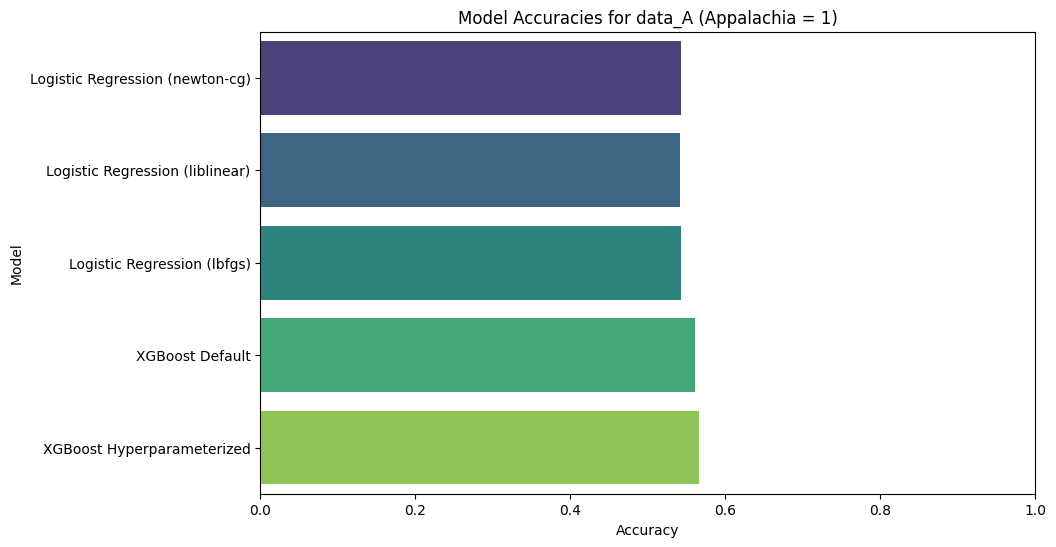

<ipython-input-40-74d535b37eeb>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies_NA, y=model_names_NA, palette='viridis')


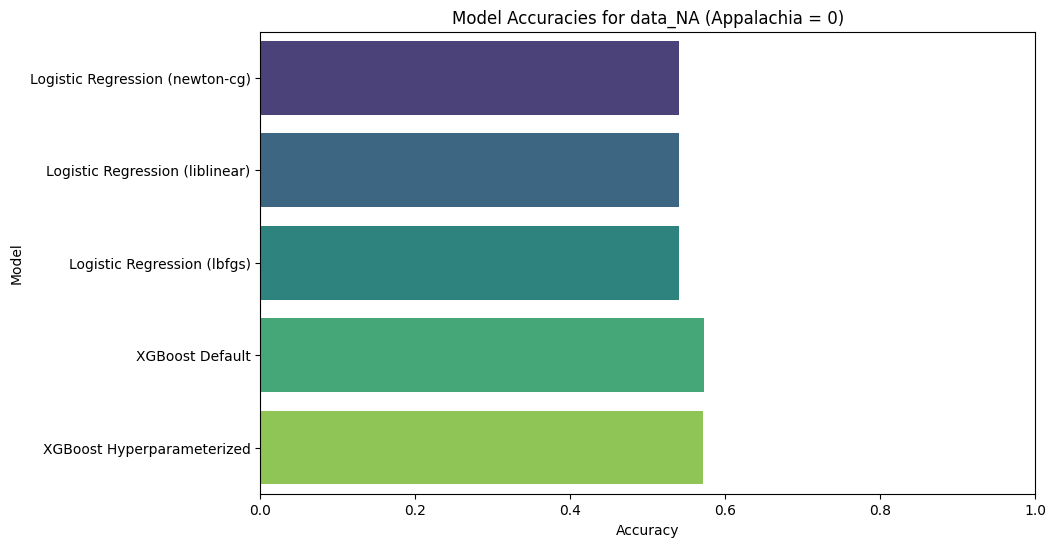


Best model for data_A is XGBoost Hyperparameterized with accuracy 0.5658


<Figure size 800x600 with 0 Axes>

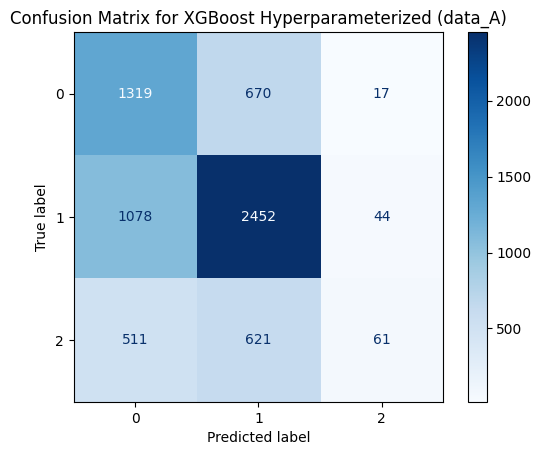


Best model for data_NA is XGBoost Default with accuracy 0.5723


<Figure size 800x600 with 0 Axes>

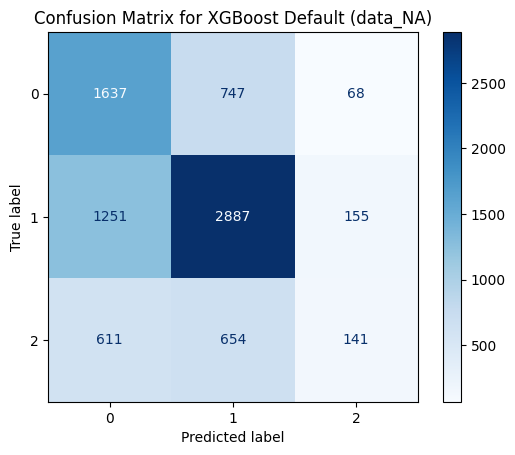

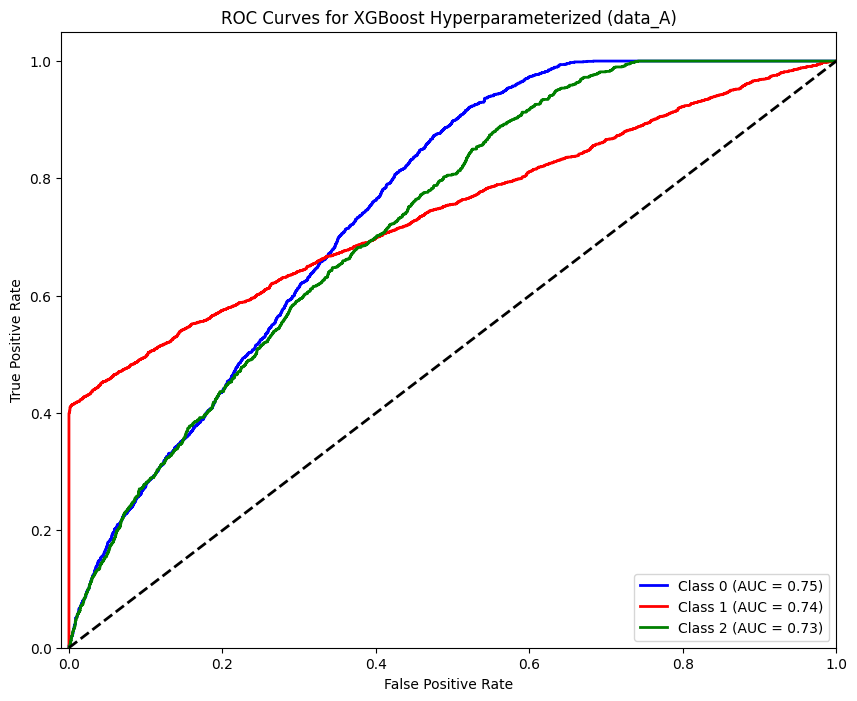

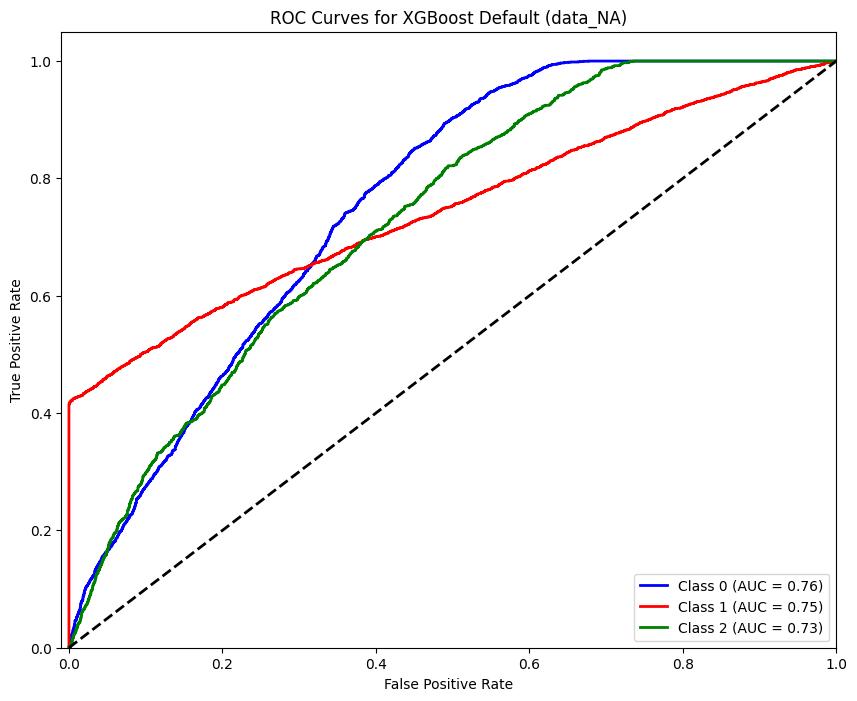

<Figure size 1000x800 with 0 Axes>

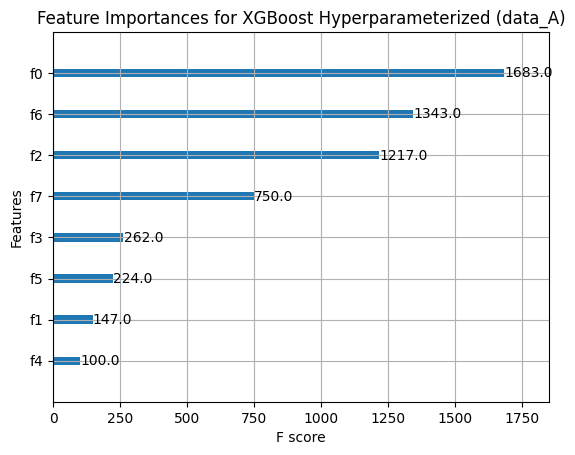

<Figure size 1000x800 with 0 Axes>

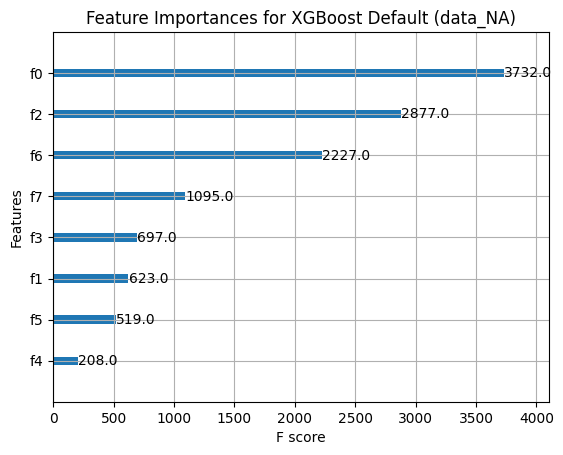

In [ ]:
# Data Visualization - Results generation Hang and Soumdra combined, Poulomi helped fix some bugs 

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from xgboost import plot_importance

# 1. Plotting Model Accuracies - Hang-------------------------------------------------------- 

# Plotting model accuracies for data_A
model_names_A = list(model_accuracies_A.keys())
accuracies_A = list(model_accuracies_A.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_A, y=model_names_A, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies for data_A (Appalachia = 1)')
plt.xlim(0, 1)
plt.show()

# Plotting model accuracies for data_NA
model_names_NA = list(model_accuracies_NA.keys())
accuracies_NA = list(model_accuracies_NA.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies_NA, y=model_names_NA, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies for data_NA (Appalachia = 0)')
plt.xlim(0, 1)
plt.show()

# 2. Confusion Matrices for the Best Models - Hang

# Determine the best model for data_A
best_model_name_A = max(model_accuracies_A, key=model_accuracies_A.get)
print(f'\nBest model for data_A is {best_model_name_A} with accuracy {model_accuracies_A[best_model_name_A]:.4f}')

# Get the best model for data_A
if 'Logistic Regression' in best_model_name_A:
    solver = best_model_name_A.split('(')[1].split(')')[0]
    best_model_A = lr_models_A[solver]
else:
    if 'Hyperparameterized' in best_model_name_A:
        best_model_A = xgb_model_hyper_A
    else:
        best_model_A = xgb_model_default_A

# Confusion Matrix for data_A best model
y_A_val_pred = best_model_A.predict(X_A_val)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_A_val, y_A_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_A.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name_A} (data_A)')
plt.show()

# Determine the best model for data_NA
best_model_name_NA = max(model_accuracies_NA, key=model_accuracies_NA.get)
print(f'\nBest model for data_NA is {best_model_name_NA} with accuracy {model_accuracies_NA[best_model_name_NA]:.4f}')

# Get the best model for data_NA
if 'Logistic Regression' in best_model_name_NA:
    solver = best_model_name_NA.split('(')[1].split(')')[0]
    best_model_NA = lr_models_NA[solver]
else:
    if 'Hyperparameterized' in best_model_name_NA:
        best_model_NA = xgb_model_hyper_NA
    else:
        best_model_NA = xgb_model_default_NA

# Confusion Matrix for data_NA best model
y_NA_val_pred = best_model_NA.predict(X_NA_val)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_NA_val, y_NA_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_NA.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name_NA} (data_NA)')
plt.show()

# 3. ROC Curves for the Best Models - Soumendra----------------------------------------------------------------

from sklearn.preprocessing import label_binarize

# ROC Curve for data_A best model
n_classes_A = len(best_model_A.classes_)
y_A_val_binarized = label_binarize(y_A_val, classes=best_model_A.classes_)
y_A_val_pred_proba = best_model_A.predict_proba(X_A_val)

# Compute ROC curve and ROC area for each class
fpr_A = dict()
tpr_A = dict()
roc_auc_A = dict()
for i in range(n_classes_A):
    fpr_A[i], tpr_A[i], _ = roc_curve(y_A_val_binarized[:, i], y_A_val_pred_proba[:, i])
    roc_auc_A[i] = auc(fpr_A[i], tpr_A[i])

# Plot ROC curves for data_A
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'darkorange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(n_classes_A):
    plt.plot(fpr_A[i], tpr_A[i], color=colors[i % len(colors)], lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(best_model_A.classes_[i], roc_auc_A[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves for {best_model_name_A} (data_A)')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for data_NA best model
n_classes_NA = len(best_model_NA.classes_)
y_NA_val_binarized = label_binarize(y_NA_val, classes=best_model_NA.classes_)
y_NA_val_pred_proba = best_model_NA.predict_proba(X_NA_val)

# Compute ROC curve and ROC area for each class
fpr_NA = dict()
tpr_NA = dict()
roc_auc_NA = dict()
for i in range(n_classes_NA):
    fpr_NA[i], tpr_NA[i], _ = roc_curve(y_NA_val_binarized[:, i], y_NA_val_pred_proba[:, i])
    roc_auc_NA[i] = auc(fpr_NA[i], tpr_NA[i])

# Plot ROC curves for data_NA
plt.figure(figsize=(10, 8))
for i in range(n_classes_NA):
    plt.plot(fpr_NA[i], tpr_NA[i], color=colors[i % len(colors)], lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(best_model_NA.classes_[i], roc_auc_NA[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves for {best_model_name_NA} (data_NA)')
plt.legend(loc="lower right")
plt.show()

# 4. Feature Importances for XGBoost Models - Soumendra

# For data_A
if 'XGBoost' in best_model_name_A:
    plt.figure(figsize=(10, 8))
    plot_importance(best_model_A, max_num_features=10)
    plt.title(f'Feature Importances for {best_model_name_A} (data_A)')
    plt.show()
elif 'Logistic Regression' in best_model_name_A:
    # For Logistic Regression, plot the coefficients
    coef = best_model_A.coef_
    feature_names = X_A.columns
    for i, class_label in enumerate(best_model_A.classes_):
        plt.figure(figsize=(10, 6))
        coefficients = coef[i]
        sns.barplot(x=coefficients, y=feature_names, palette='coolwarm')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.title(f'Logistic Regression Coefficients for Class {class_label} (data_A)')
        plt.tight_layout()
        plt.show()

# For data_NA
if 'XGBoost' in best_model_name_NA:
    plt.figure(figsize=(10, 8))
    plot_importance(best_model_NA, max_num_features=10)
    plt.title(f'Feature Importances for {best_model_name_NA} (data_NA)')
    plt.show()
elif 'Logistic Regression' in best_model_name_NA:
    # For Logistic Regression, plot the coefficients
    coef = best_model_NA.coef_
    feature_names = X_NA.columns
    for i, class_label in enumerate(best_model_NA.classes_):
        plt.figure(figsize=(10, 6))
        coefficients = coef[i]
        sns.barplot(x=coefficients, y=feature_names, palette='coolwarm')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.title(f'Logistic Regression Coefficients for Class {class_label} (data_NA)')
        plt.tight_layout()
        plt.show()


Now we will do part IV - point 5.

Explanation and Comments:

Initialization of Dictionairies:

We initialize dictioinaries confusion_matrices_A and accuracies_A for data_A to store confusiion matrices and accuracies of each model.
Similarly, we initialize confusion_matrices_NA and accuracies_NA for data_NA.
Building Confusion Matrices and Calculating Accuracies:

For each model, we use the validaition set prediictions (y_A_pred or y_NA_pred) and true labels (y_A_val or y_NA_val) to build the confusiion matrix using confusion_matrix().
We calculate the accuracy using accuracy_score().
We store these results in the respective dictionairies for future use.

Printiing Results:

We print the confusion matrix, accuracy, and classificaition report for each model to provide detailed insights into the model's performance.
The classification report includes preciision, recall, F1-score, and support for each class.
Summary of Accuraciies:

At the end, we print a summary of accuraciies for all models in both data_A and data_NA to easily compare their performance.

Commenting About ML Accuracy:

Understanding the Confuision Matrix:

The confusion matrix provides a breakdown of true positives, true negatives, false positives, and false negatives for each class.
It helps in understanding where the model is making correct prediictions and where it is misclassifiying.

Interprieting Accuracy:

Accuracy is the ratio of correctly predicted observatiions to the total observations.
While accuracy is a good measure, it does not account for imbalaniced datasets where one class may dominate.

Using Classification Report:

Precision measures the model's ability to correctly predict the positiive class.
Recall measures the model's ability to find all the positive instances.
F1-score is the harmonic mean of precision and recall, proviiding a balance between the two.
Support is the number of actual occurrences of each class in the dataset.
i
Example Output Interpretation:

If a model has high accuracy but low precision or recall for certain classes, it might not be performing well on those classes.
Comparing the accuracies and confusion matrices across different models helps in selecting the best-performiing model.

Storing Outputs in Variables:

Confusion matrices and accuracies are stored in dictionariies (confusion_matrices_A, accuracies_A, confusion_matrices_NA, accuracies_NA) with model names as keys.
This allows easy access to the results for any subsequeint analysis or steps.
Notes:

Ensure that you have the neciessary data (data_A, data_NA, lr_models_A, xgb_model_default_A, etc.) from the previous steps before ruinning this code.
Handle any potential warnings or errors, especially if the classes in your target variable are imbalanced or if there are any issues with the predictiions.
You may need to adjust the multi_class parameter in LogisticRegression or the eval_metric in XGBClassifier based on your speciific dataset.



In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# For data_A (Appalachia = 1)
print("Confusion Matrices and Accuracy for data_A (Appalachia = 1)\n")

# Initialize dictionaries to store confusion matrices and accuracies
confusion_matrices_A = {}
accuracies_A = {}

# a. Logistic Regression Models
print("Logistic Regression Models for data_A")
for solver in solvers:
    # Predict on validation set
    y_A_pred = lr_models_A[solver].predict(X_A_val)
    # Build confusion matrix
    cm = confusion_matrix(y_A_val, y_A_pred)
    # Store confusion matrix
    confusion_matrices_A[f'Logistic Regression ({solver})'] = cm
    # Calculate accuracy
    accuracy = accuracy_score(y_A_val, y_A_pred)
    accuracies_A[f'Logistic Regression ({solver})'] = accuracy
    # Print results
    print(f"\nSolver: {solver}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_A_val, y_A_pred))

# b. XGBoost Models
print("\nXGBoost Models for data_A")

# Default XGBoost model
y_A_pred_default = xgb_model_default_A.predict(X_A_val)
cm_default = confusion_matrix(y_A_val, y_A_pred_default)
confusion_matrices_A['XGBoost Default'] = cm_default
accuracy_default = accuracy_score(y_A_val, y_A_pred_default)
accuracies_A['XGBoost Default'] = accuracy_default
print("\nXGBoost Default")
print("Confusion Matrix:")
print(cm_default)
print(f"Accuracy: {accuracy_default:.4f}")
print("Classification Report:")
print(classification_report(y_A_val, y_A_pred_default))

# Hyperparameterized XGBoost model
y_A_pred_hyper = xgb_model_hyper_A.predict(X_A_val)
cm_hyper = confusion_matrix(y_A_val, y_A_pred_hyper)
confusion_matrices_A['XGBoost Hyperparameterized'] = cm_hyper
accuracy_hyper = accuracy_score(y_A_val, y_A_pred_hyper)
accuracies_A['XGBoost Hyperparameterized'] = accuracy_hyper
print("\nXGBoost Hyperparameterized")
print("Confusion Matrix:")
print(cm_hyper)
print(f"Accuracy: {accuracy_hyper:.4f}")
print("Classification Report:")
print(classification_report(y_A_val, y_A_pred_hyper))

# For data_NA (Appalachia = 0)
print("\nConfusion Matrices and Accuracy for data_NA (Appalachia = 0)\n")

# Initialize dictionaries to store confusion matrices and accuracies
confusion_matrices_NA = {}
accuracies_NA = {}

# a. Logistic Regression Models
print("Logistic Regression Models for data_NA")
for solver in solvers:
    # Predict on validation set
    y_NA_pred = lr_models_NA[solver].predict(X_NA_val)
    # Build confusion matrix
    cm = confusion_matrix(y_NA_val, y_NA_pred)
    # Store confusion matrix
    confusion_matrices_NA[f'Logistic Regression ({solver})'] = cm
    # Calculate accuracy
    accuracy = accuracy_score(y_NA_val, y_NA_pred)
    accuracies_NA[f'Logistic Regression ({solver})'] = accuracy
    # Print results
    print(f"\nSolver: {solver}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_NA_val, y_NA_pred))

# b. XGBoost Models
print("\nXGBoost Models for data_NA")

# Default XGBoost model
y_NA_pred_default = xgb_model_default_NA.predict(X_NA_val)
cm_default_NA = confusion_matrix(y_NA_val, y_NA_pred_default)
confusion_matrices_NA['XGBoost Default'] = cm_default_NA
accuracy_default_NA = accuracy_score(y_NA_val, y_NA_pred_default)
accuracies_NA['XGBoost Default'] = accuracy_default_NA
print("\nXGBoost Default")
print("Confusion Matrix:")
print(cm_default_NA)
print(f"Accuracy: {accuracy_default_NA:.4f}")
print("Classification Report:")
print(classification_report(y_NA_val, y_NA_pred_default))

# Hyperparameterized XGBoost model
y_NA_pred_hyper = xgb_model_hyper_NA.predict(X_NA_val)
cm_hyper_NA = confusion_matrix(y_NA_val, y_NA_pred_hyper)
confusion_matrices_NA['XGBoost Hyperparameterized'] = cm_hyper_NA
accuracy_hyper_NA = accuracy_score(y_NA_val, y_NA_pred_hyper)
accuracies_NA['XGBoost Hyperparameterized'] = accuracy_hyper_NA
print("\nXGBoost Hyperparameterized")
print("Confusion Matrix:")
print(cm_hyper_NA)
print(f"Accuracy: {accuracy_hyper_NA:.4f}")
print("Classification Report:")
print(classification_report(y_NA_val, y_NA_pred_hyper))

# Summary of accuracies
print("\nSummary of Accuracies for data_A:")
for model_name, acc in accuracies_A.items():
    print(f"{model_name}: {acc:.4f}")

print("\nSummary of Accuracies for data_NA:")
for model_name, acc in accuracies_NA.items():
    print(f"{model_name}: {acc:.4f}")


Confusion Matrices and Accuracy for data_A (Appalachia = 1)

Logistic Regression Models for data_A

Solver: newton-cg
Confusion Matrix:
[[ 754 1206   46]
 [ 627 2859   88]
 [ 384  748   61]]
Accuracy: 0.5424
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40      2006
           1       0.59      0.80      0.68      3574
           2       0.31      0.05      0.09      1193

    accuracy                           0.54      6773
   macro avg       0.44      0.41      0.39      6773
weighted avg       0.50      0.54      0.49      6773


Solver: liblinear
Confusion Matrix:
[[ 732 1250   24]
 [ 614 2891   69]
 [ 389  763   41]]
Accuracy: 0.5410
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.36      0.39      2006
           1       0.59      0.81      0.68      3574
           2       0.31      0.03      0.06      1193

    accuracy                          

Here we will do part IV - 6

This code builds the accuracy data by calculating the False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds for each machine leairning model on both data_A and data_NA.

Explanation and Comments:

Importing Necessary Libraries:

We import roc_curve and auc from sklearn.metrics to calcuilate the ROC curve data and the Area Under the Curve (AUC).
Initializing Dictionaries:

roc_data_A and roc_data_NA are dictionaries to store the FPR, TPR, Thresholds, and ROC AUC for each model in data_A and data_NA, respectiively.

Defining a Function to Calculiate ROC Data:

calculate_roc_data is a helper function that takes a model, validiation features, validation labels, and the model name as inputs.
It calculates the predicted probabiliities using predict_proba method.
Since we are dealing with multi-class classifiication, we need to compute the ROC curve for each class. We use the one-vs-rest (OvR) approach by binariizing the output labels.
We loop through each class and calculiate the FPR, TPR, and Thresholds using roc_curve.
We also calculate the AUC for each class using auc.
The function returns a dictionary containing FPR, TPR, Thresholds, and ROC AUC for each class.

Calculating ROC Data for data_A:

We iterate over each Logistic Regresision model in lr_models_A and calculate the ROC data.
Similarly, we calculate ROC data for both the default and hyperparameteriized XGBoost models.
The ROC AUC scores for each class are printed for evaluation.
The results are stored in the roc_data_A dictiionary with the model names as keys.

Calculating ROC Data for data_NA:

The same process is repeated for data_NA, iteratiing over the Logisitic Regression models in lr_models_NA and the XGBoost models.
The results are stored in the roc_data_NA dictionary.

Storing Outputs:

The outputs (FPR, TPR, Thresholds, ROC AUC) are stored in the dictioniaries roc_data_A and roc_data_NA. These can be accesised later using the model names as keys.
For example, to access the FPR for class 0 of the Logistic Regresision model with solver newton-cg on data_A, you can use:

fpr_class0 = roc_data_A['Logistic Regression (newton-cg)']['fpr'][0]

Notes on Multi-Class ROC Curves:

In multi-class classification problems, the ROC curve can be exteinded by using strategies like one-vs-rest (OvR), where we compute the ROC curve for each class against all other classes.
The label_binarize function is used to binairize the labels for this purpose.
The ROC AUC score is calculated for each class, proviiding insights into the model's performance for each speciific class.


In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Build Accuracy Data: FPR, TPR, and Thresholds
# For each data part (both data_A and data_NA), calculate FPR, TPR, and Thresholds

# Initialize dictionaries to store FPR, TPR, and Thresholds
roc_data_A = {}
roc_data_NA = {}

# Function to calculate ROC data
def calculate_roc_data(model, X_val, y_val, model_name):
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_val)

    # For multi-class classification, you need to compute ROC curve for each class
    # Here, we will binarize the output and consider one-vs-rest approach
    fpr = {}
    tpr = {}
    thresholds = {}
    roc_auc = {}
    n_classes = len(set(y_val))

    # Binarize the labels
    from sklearn.preprocessing import label_binarize
    y_val_binarized = label_binarize(y_val, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_val_binarized[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Store the results
    roc_data = {
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds,
        'roc_auc': roc_auc
    }

    return roc_data

# For data_A (Appalachia = 1)
print("\nCalculating ROC data for data_A (Appalachia = 1)")

# a. Logistic Regression Models
print("\nLogistic Regression Models for data_A")
for solver in solvers:
    model = lr_models_A[solver]
    # Calculate ROC data
    roc_data = calculate_roc_data(model, X_A_val, y_A_val, f'Logistic Regression ({solver})')
    # Store the ROC data
    roc_data_A[f'Logistic Regression ({solver})'] = roc_data
    # Print ROC AUC for each class
    print(f"\nROC AUC Scores for Logistic Regression ({solver}):")
    for i in roc_data['roc_auc']:
        print(f"Class {i}: ROC AUC = {roc_data['roc_auc'][i]:.4f}")

# b. XGBoost Models
print("\nXGBoost Models for data_A")

# Default XGBoost model
roc_data = calculate_roc_data(xgb_model_default_A, X_A_val, y_A_val, 'XGBoost Default')
roc_data_A['XGBoost Default'] = roc_data
print("\nROC AUC Scores for XGBoost Default:")
for i in roc_data['roc_auc']:
    print(f"Class {i}: ROC AUC = {roc_data['roc_auc'][i]:.4f}")

# Hyperparameterized XGBoost model
roc_data = calculate_roc_data(xgb_model_hyper_A, X_A_val, y_A_val, 'XGBoost Hyperparameterized')
roc_data_A['XGBoost Hyperparameterized'] = roc_data
print("\nROC AUC Scores for XGBoost Hyperparameterized:")
for i in roc_data['roc_auc']:
    print(f"Class {i}: ROC AUC = {roc_data['roc_auc'][i]:.4f}")

# For data_NA (Appalachia = 0)
print("\nCalculating ROC data for data_NA (Appalachia = 0)")

# a. Logistic Regression Models
print("\nLogistic Regression Models for data_NA")
for solver in solvers:
    model = lr_models_NA[solver]
    # Calculate ROC data
    roc_data = calculate_roc_data(model, X_NA_val, y_NA_val, f'Logistic Regression ({solver})')
    # Store the ROC data
    roc_data_NA[f'Logistic Regression ({solver})'] = roc_data
    # Print ROC AUC for each class
    print(f"\nROC AUC Scores for Logistic Regression ({solver}):")
    for i in roc_data['roc_auc']:
        print(f"Class {i}: ROC AUC = {roc_data['roc_auc'][i]:.4f}")

# b. XGBoost Models
print("\nXGBoost Models for data_NA")

# Default XGBoost model
roc_data = calculate_roc_data(xgb_model_default_NA, X_NA_val, y_NA_val, 'XGBoost Default')
roc_data_NA['XGBoost Default'] = roc_data
print("\nROC AUC Scores for XGBoost Default:")
for i in roc_data['roc_auc']:
    print(f"Class {i}: ROC AUC = {roc_data['roc_auc'][i]:.4f}")

# Hyperparameterized XGBoost model
roc_data = calculate_roc_data(xgb_model_hyper_NA, X_NA_val, y_NA_val, 'XGBoost Hyperparameterized')
roc_data_NA['XGBoost Hyperparameterized'] = roc_data
print("\nROC AUC Scores for XGBoost Hyperparameterized:")
for i in roc_data['roc_auc']:
    print(f"Class {i}: ROC AUC = {roc_data['roc_auc'][i]:.4f}")

# At this point, roc_data_A and roc_data_NA dictionaries contain FPR, TPR, Thresholds, and ROC AUC for each model



Calculating ROC data for data_A (Appalachia = 1)

Logistic Regression Models for data_A

ROC AUC Scores for Logistic Regression (newton-cg):
Class 0: ROC AUC = 0.6822
Class 1: ROC AUC = 0.7154
Class 2: ROC AUC = 0.6845

ROC AUC Scores for Logistic Regression (liblinear):
Class 0: ROC AUC = 0.6775
Class 1: ROC AUC = 0.7150
Class 2: ROC AUC = 0.6810

ROC AUC Scores for Logistic Regression (lbfgs):
Class 0: ROC AUC = 0.6822
Class 1: ROC AUC = 0.7154
Class 2: ROC AUC = 0.6845

XGBoost Models for data_A

ROC AUC Scores for XGBoost Default:
Class 0: ROC AUC = 0.7429
Class 1: ROC AUC = 0.7379
Class 2: ROC AUC = 0.7169

ROC AUC Scores for XGBoost Hyperparameterized:
Class 0: ROC AUC = 0.7501
Class 1: ROC AUC = 0.7441
Class 2: ROC AUC = 0.7256

Calculating ROC data for data_NA (Appalachia = 0)

Logistic Regression Models for data_NA

ROC AUC Scores for Logistic Regression (newton-cg):
Class 0: ROC AUC = 0.6819
Class 1: ROC AUC = 0.7110
Class 2: ROC AUC = 0.6857

ROC AUC Scores for Logistic Reg

Vizualization -


Plotting ROC Curves for data_A (Appalachia = 1)


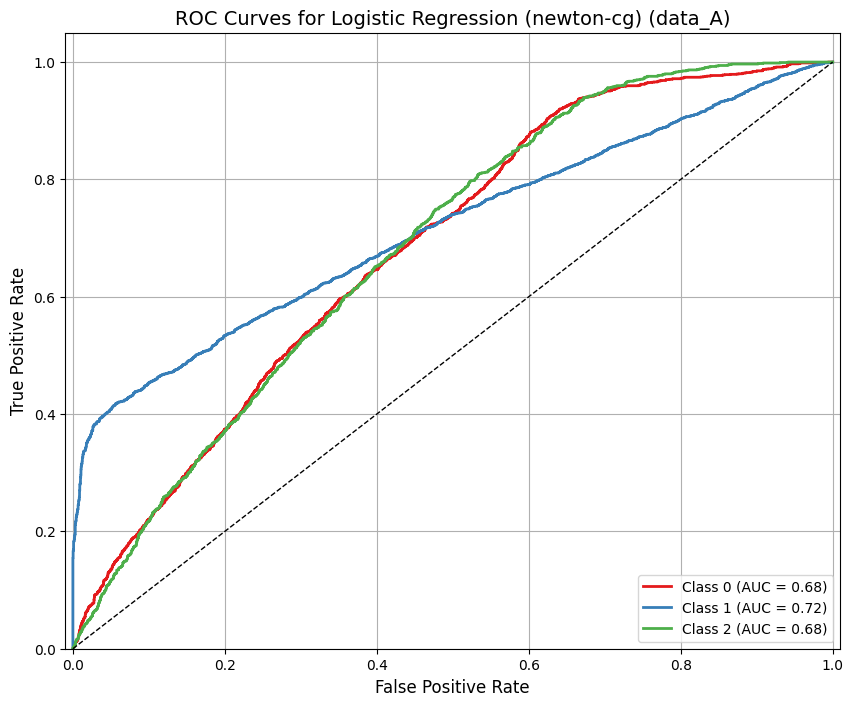

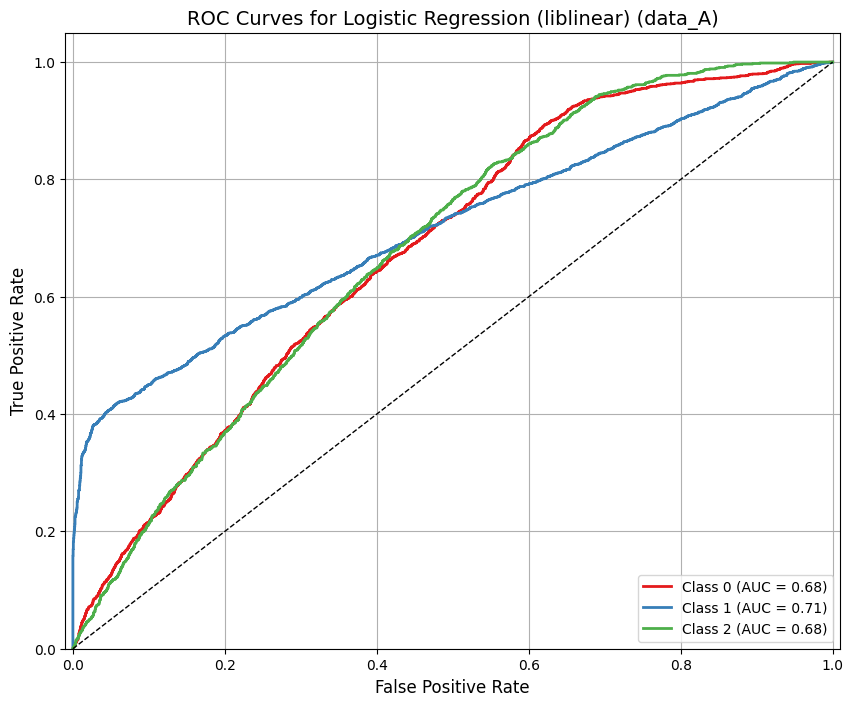

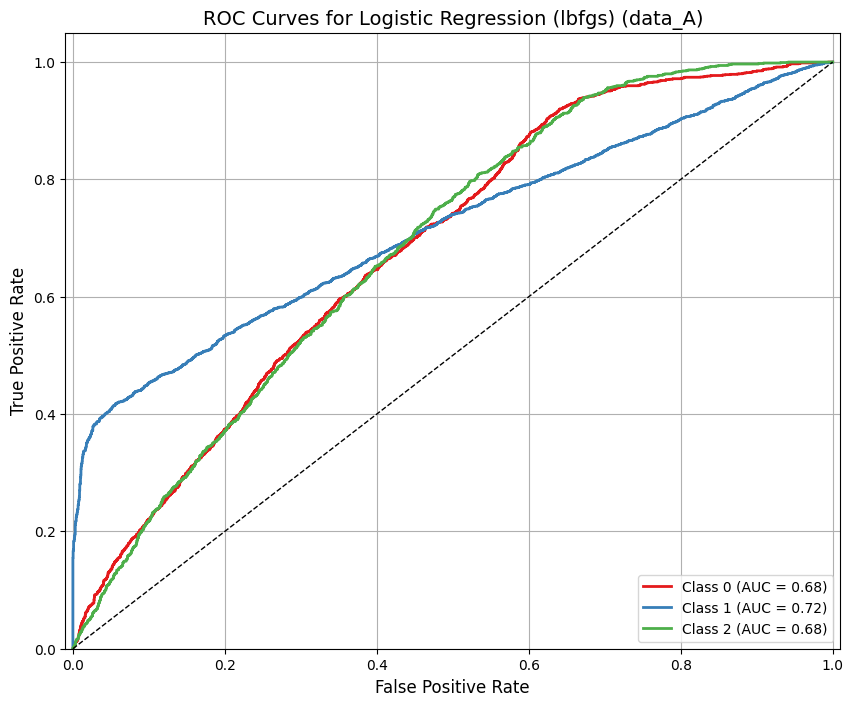

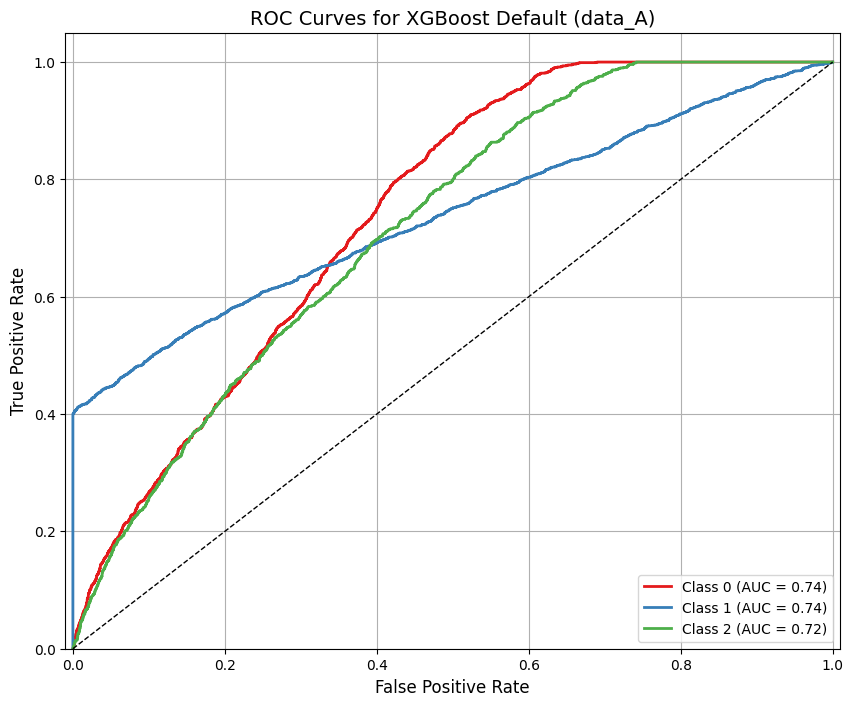

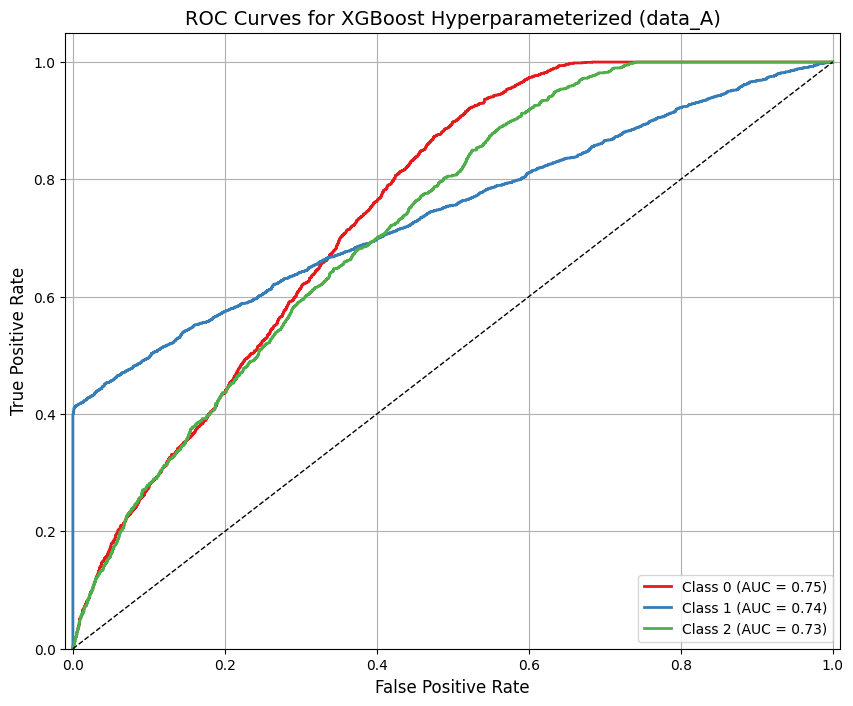


Plotting ROC Curves for data_NA (Appalachia = 0)


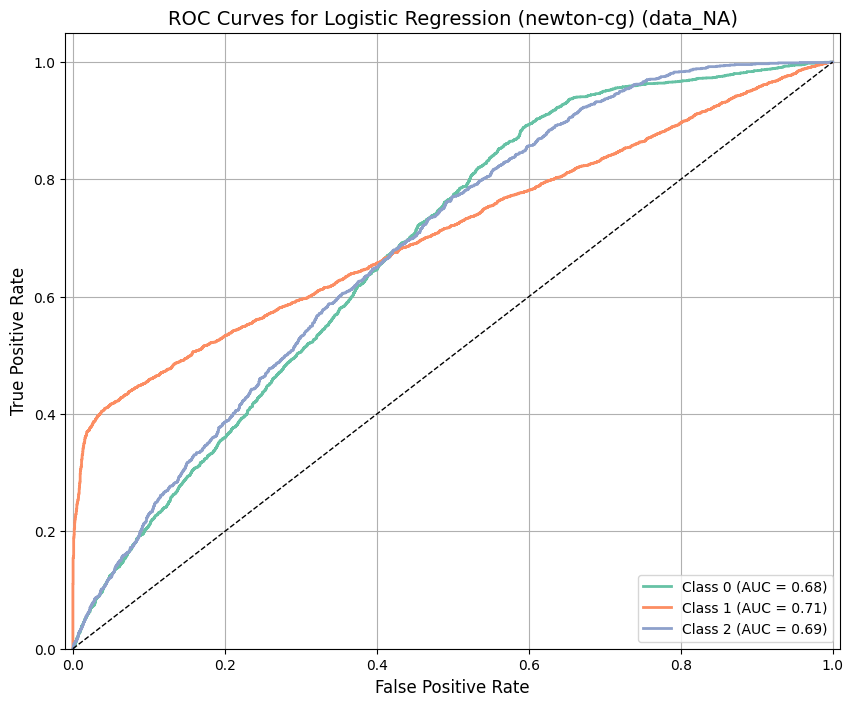

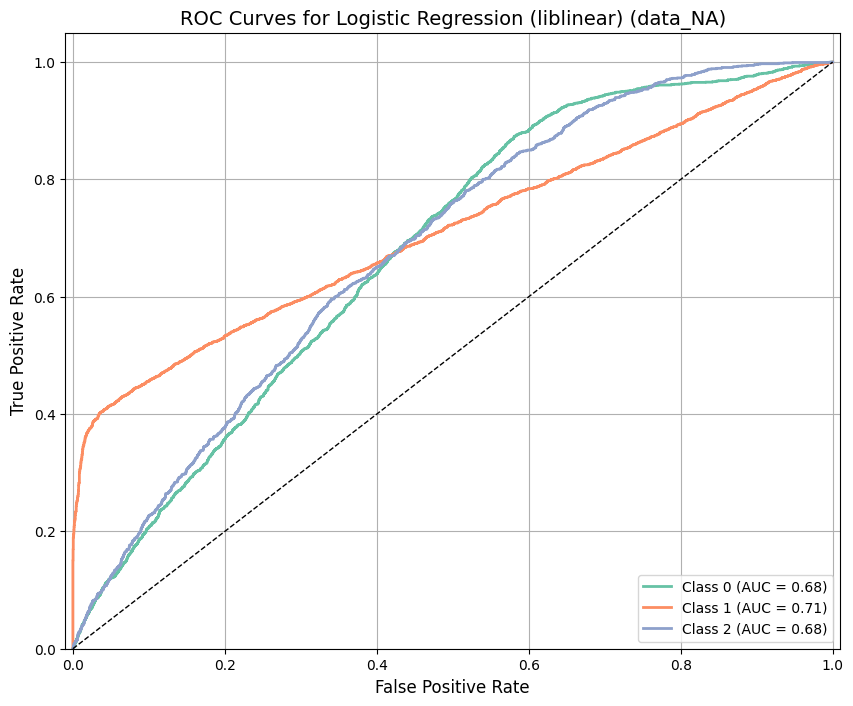

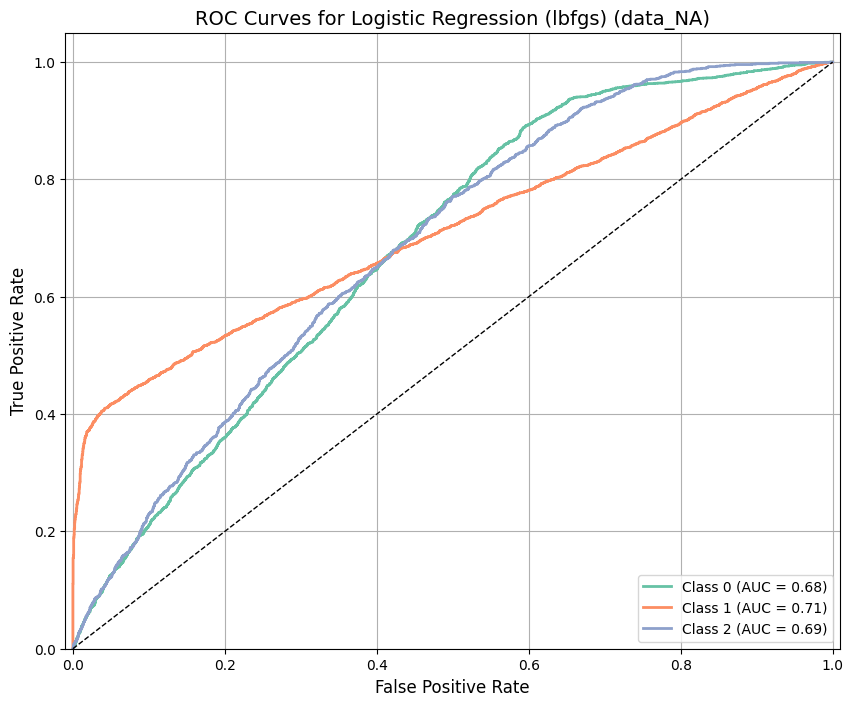

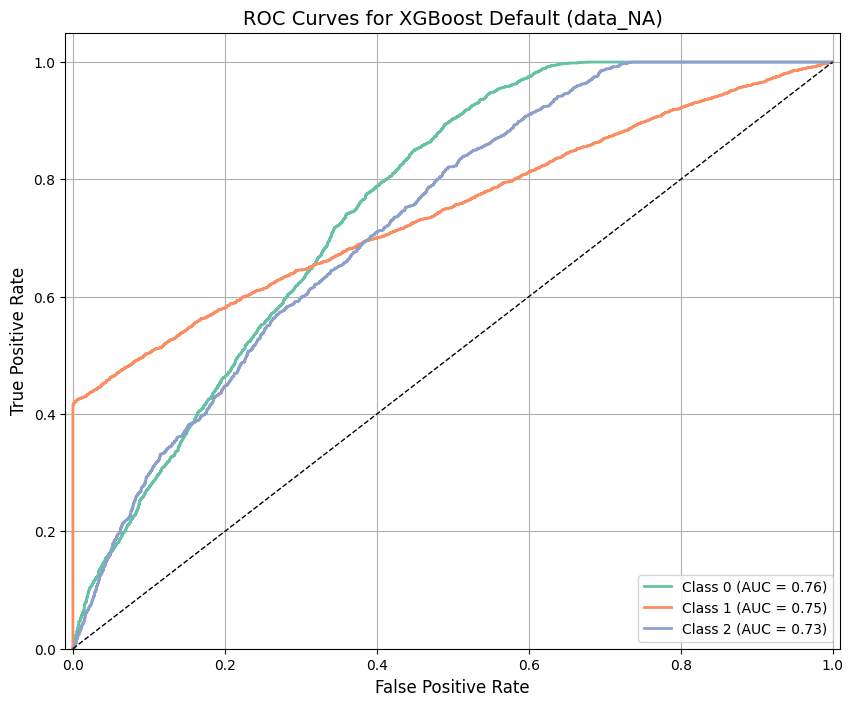

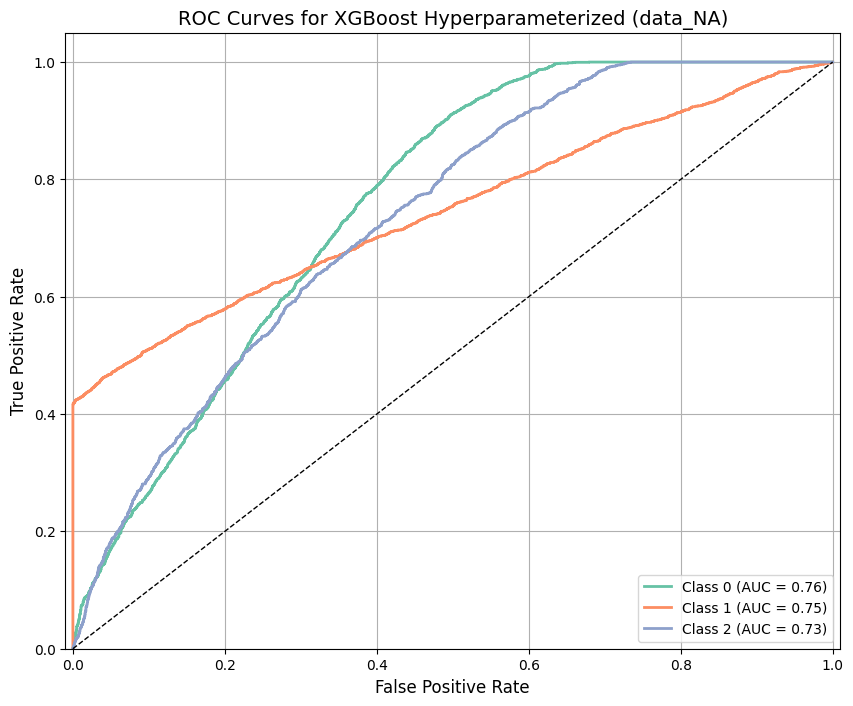


Comparing ROC Curves of Different Models for data_A (Appalachia = 1)


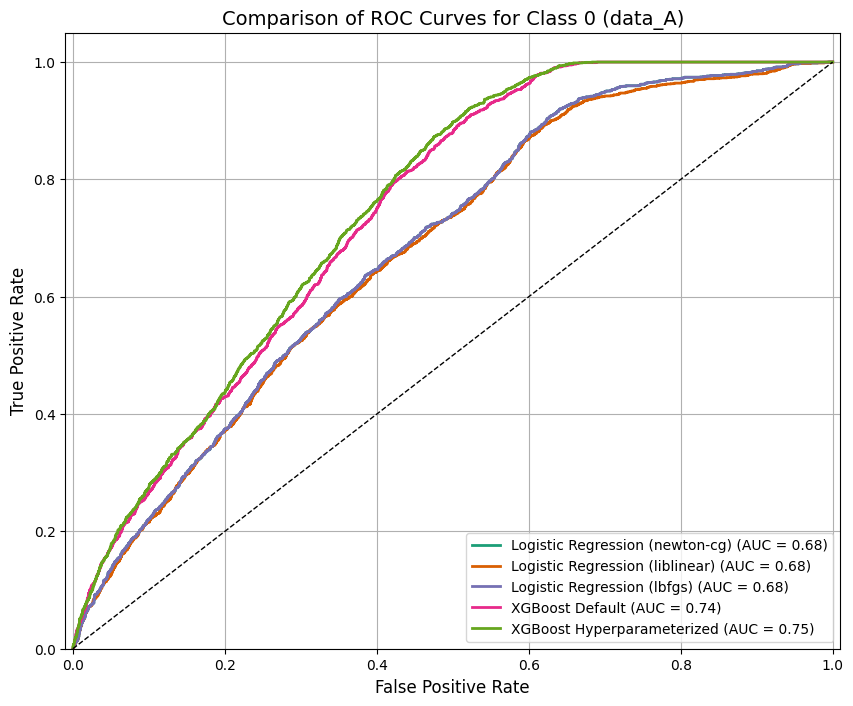

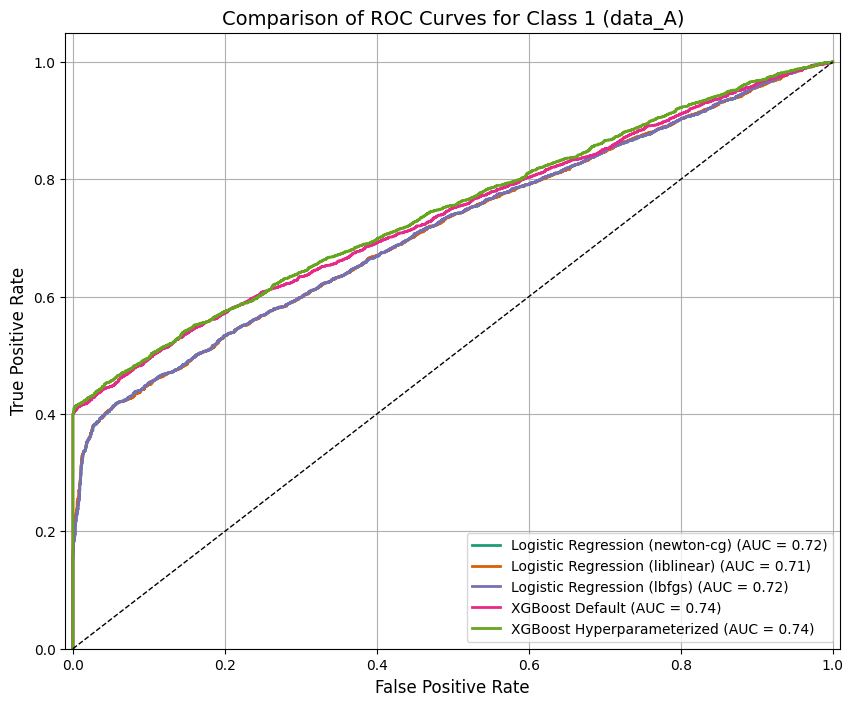

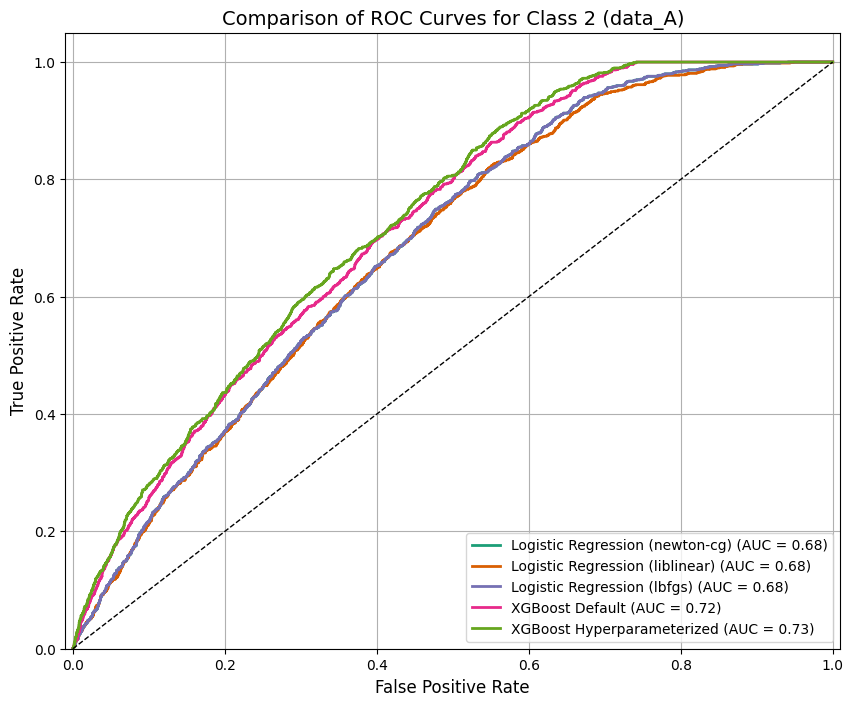


Comparing ROC Curves of Different Models for data_NA (Appalachia = 0)


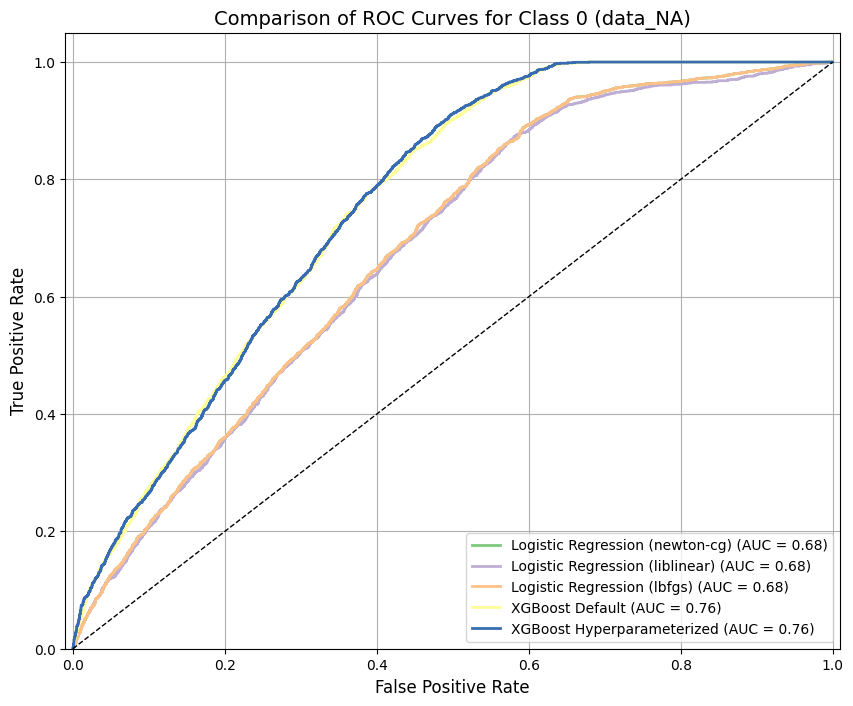

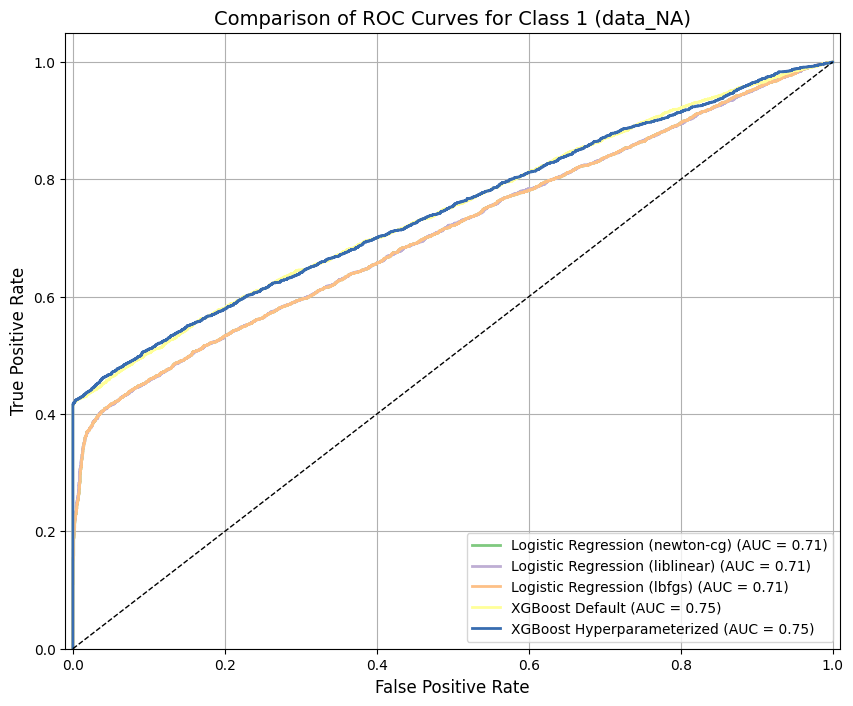

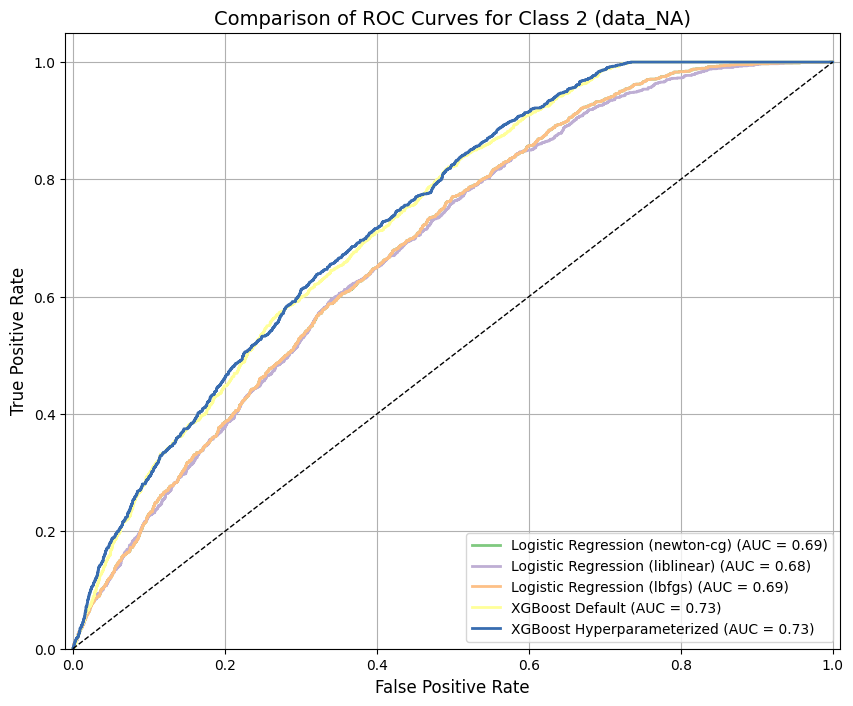

In [ ]:
# Data Visualization for ROC Curves

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline if using Jupyter Notebook
%matplotlib inline

# 1. Plotting ROC Curves for data_A

print("\nPlotting ROC Curves for data_A (Appalachia = 1)")

# For each model in roc_data_A
for model_name, roc_info in roc_data_A.items():
    fpr = roc_info['fpr']
    tpr = roc_info['tpr']
    roc_auc = roc_info['roc_auc']
    n_classes = len(roc_auc)

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    colors = sns.color_palette("Set1", n_classes)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves for {model_name} (data_A)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()

# 2. Plotting ROC Curves for data_NA

print("\nPlotting ROC Curves for data_NA (Appalachia = 0)")

# For each model in roc_data_NA
for model_name, roc_info in roc_data_NA.items():
    fpr = roc_info['fpr']
    tpr = roc_info['tpr']
    roc_auc = roc_info['roc_auc']
    n_classes = len(roc_auc)

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    colors = sns.color_palette("Set2", n_classes)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curves for {model_name} (data_NA)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()

# 3. Comparing ROC Curves of Different Models for data_A

print("\nComparing ROC Curves of Different Models for data_A (Appalachia = 1)")

# Assuming the classes are the same across models
n_classes = len(next(iter(roc_data_A.values()))['roc_auc'])

for i in range(n_classes):
    plt.figure(figsize=(10, 8))
    colors = sns.color_palette("Dark2", len(roc_data_A))
    for idx, (model_name, roc_info) in enumerate(roc_data_A.items()):
        fpr = roc_info['fpr'][i]
        tpr = roc_info['tpr'][i]
        roc_auc = roc_info['roc_auc'][i]
        plt.plot(fpr, tpr, color=colors[idx], lw=2, label='{0} (AUC = {1:0.2f})'.format(model_name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'Comparison of ROC Curves for Class {i} (data_A)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()

# 4. Comparing ROC Curves of Different Models for data_NA

print("\nComparing ROC Curves of Different Models for data_NA (Appalachia = 0)")

# Assuming the classes are the same across models
n_classes = len(next(iter(roc_data_NA.values()))['roc_auc'])

for i in range(n_classes):
    plt.figure(figsize=(10, 8))
    colors = sns.color_palette("Accent", len(roc_data_NA))
    for idx, (model_name, roc_info) in enumerate(roc_data_NA.items()):
        fpr = roc_info['fpr'][i]
        tpr = roc_info['tpr'][i]
        roc_auc = roc_info['roc_auc'][i]
        plt.plot(fpr, tpr, color=colors[idx], lw=2, label='{0} (AUC = {1:0.2f})'.format(model_name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'Comparison of ROC Curves for Class {i} (data_NA)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()


Here we do Part IV - point 7 and point 8.

Here we do specifically item 8, which involves calculatiing confusion matrices by resampling the data (n_bootstraps = 1000) to provide 1000 data points for plotting the AUROC curve in step 7.

Explanation and Comments:

Imports and Initialization:

We import numpy for numerical operations, confusion_matirix, roc_curve, and auc from sklearn.metrics, resample from sklearn.utils for bootstraipping, and matplotlib.pyplot for plotting.
We set n_bootstraps = 1000 as per the assignmeint and a random seed for reproducibility.
Selecting the Best Model:

We assume the hyperparameterized XGBoost model performed best for both datasets (best_model_A and best_model_NA). Adjust this if another model performied better.
Bootstrapping Function (bootstrap_roc):

This function performs the bootstraipping proicedure to calculate the ROC data.

Resampling:
For each bootstrap iteration, we resample the valiidation data (X_val and y_val) with replacement using resample.
Predicting Probabilities:
We use the model's predict_proba method to get the predicted probabiliities on the resampled data.
Binarizing Labels:
We binarize the resampled labels using label_binariize for multi-class ROC computation.

Calculating ROC Curves:
We compute the ROC curve and AUC for each class.
We also compute the micro-average ROC curve and AUC, which aggregiates the contributiions of all classes.
Interpolating TPR:
We interpolate the true positive rates (tpr) at common false posiitive rates (mean_fpr) to average the ROC curves later.
Storing Results:
We store the interpolated TPRs and AUCs for each bootstrap iteratioin.

Running Bootstriiapping for Both Datasets:

We call the bootstrap_roc function for both data_A and data_NA.
The results are stored in bootstrap_results_A and bootstrap_results_NA.
Plotting Function (plot_bootstrap_roc):

This function plots the bootstrapped ROC curve with the mean and standard deviation.
Calculating Mean and STD:
We calculate the mean and standard deviation of the true positiive rates across all bootstraps.
The mean AUC and its standard deviatiion are also calciulated.

Plotting:
We plot the mean ROC curve with the mean AUC.
The standard deviation is represeinted as a shaded area around the mean ROC curve.
The chance line (baseline) is also plotted.
The plot is customized with titles, labels, legends, and grid.
Plotting AUROC for Both Datasets:

We call the plot_bootstrap_roc function for both data_A and data_NA.
Storing Outputs:

The bootstrapped ROC data is stored in bootstirapped_auc_data_A and bootstrapped_auc_data_NA for potential use in later steps.

Notes and Considerations:

Multi-Class ROC Curves:

Since we're dealing with multi-class classifiiication, we compute the micro-average ROC curve, which aggregates the true positiives and false positives across all classes.
Alternatively, you can compute macro-averaige ROC curves or plot ROC curves for individual classes if needed.
Confusion Matrices:

In this bootstrapiping process, confusion matrices are implicitily involved in calculating TPR and FPR but are not explicitly stored. If you need to store confusion matrices for each bootstrap, you can moidify the code to include this.
For example, within the bootstrap loop, you can calculate the confusiion matrix using confusion_matrix(y_resampled, y_predicited_classes) and store it.

Predictiing Classes vs. Probabiilities:

For ROC curves, we use predicted probabiliities (predict_proba) rather than predicted classes (predict), as ROC curves are plotted based on varying classificatiion thresholds.

Computatiional Efficieincy:

Bootstrapping with 1000 iterations can be computatioinally intensiive. Ensure that your computiing envirionment can handle this. If not, consider reducing n_bootstraps for testiing purposes.

Adjusting for Your Dataset:

Ensure that the variable names (X_A_val, y_A_val, etc.) match those in your existing code.
If your target variable (y_val) is not in the correct format (e.g., not a Pandas Series), you may need to adjust the code accoridingly.

Random Seed:

Setting a random seed ensures reproduciibility of the bootstraipping results.

Conclusion:

By resampling the validation data 1000 times and calculatiing the ROC data for each resample, we obtain a robust estimate of the model's performanice. Plotting the mean ROC curve with its variabiility (standard deviation) provides insights into the stability and reliaibility of the model across differenit samples of the data.



Bootstrapping ROC data for data_A (Appalachia = 1)

Bootstrapping ROC data for data_NA (Appalachia = 0)

Plotting Bootstrapped AUROC for data_A (Appalachia = 1)


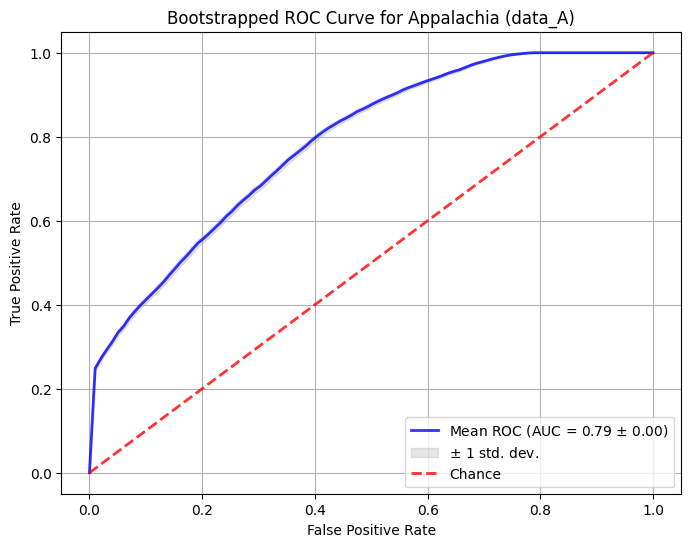


Plotting Bootstrapped AUROC for data_NA (Appalachia = 0)


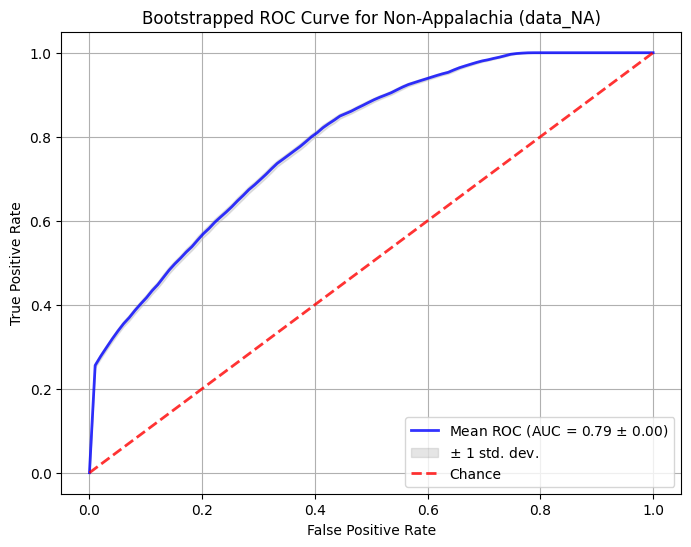

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Set the number of bootstraps
n_bootstraps = 1000
rng_seed = 42  # Seed for reproducibility
np.random.seed(rng_seed)

# Choose the best model based on previous evaluation
# Assuming the hyperparameterized XGBoost model performed best for both datasets
best_model_A = xgb_model_hyper_A
best_model_NA = xgb_model_hyper_NA

# Initialize lists to store TPR, FPR, and thresholds for each bootstrap
bootstrap_results_A = {'tpr': [], 'fpr': [], 'roc_auc': []}
bootstrap_results_NA = {'tpr': [], 'fpr': [], 'roc_auc': []}

# Function to perform bootstrapping and calculate ROC data
def bootstrap_roc(model, X_val, y_val, n_bootstraps, n_classes, dataset_name):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i in range(n_bootstraps):
        # Resample the validation data with replacement
        indices = resample(range(len(X_val)), replace=True)
        X_resampled = X_val[indices]
        y_resampled = y_val.iloc[indices]

        # Predict probabilities
        y_proba = model.predict_proba(X_resampled)

        # Binarize the labels for multi-class ROC
        y_resampled_binarized = label_binarize(y_resampled, classes=range(n_classes))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_resampled_binarized[:, j], y_proba[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_resampled_binarized.ravel(), y_proba.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Interpolate the TPR at the mean FPR points
        interp_tpr = np.interp(mean_fpr, fpr["micro"], tpr["micro"])
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(roc_auc["micro"])

    # Store the results
    bootstrap_results = {
        'mean_fpr': mean_fpr,
        'tprs': tprs,
        'aucs': aucs
    }
    return bootstrap_results

# For data_A (Appalachia = 1)
print("\nBootstrapping ROC data for data_A (Appalachia = 1)")
n_classes_A = len(set(y_A_val))
bootstrap_results_A = bootstrap_roc(best_model_A, X_A_val, y_A_val, n_bootstraps, n_classes_A, 'data_A')

# For data_NA (Appalachia = 0)
print("\nBootstrapping ROC data for data_NA (Appalachia = 0)")
n_classes_NA = len(set(y_NA_val))
bootstrap_results_NA = bootstrap_roc(best_model_NA, X_NA_val, y_NA_val, n_bootstraps, n_classes_NA, 'data_NA')

# Plotting the AUROC with bootstrapped results
def plot_bootstrap_roc(bootstrap_results, dataset_name):
    mean_fpr = bootstrap_results['mean_fpr']
    tprs = bootstrap_results['tprs']
    aucs = bootstrap_results['aucs']

    # Calculate the mean and standard deviation of the TPRs
    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)
    mean_tpr[-1] = 1.0  # Ensure that TPR ends at 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    # Plot the mean ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=0.8)

    # Plot the standard deviation as a shaded area
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = mean_tpr - std_tpr
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=0.2,
                     label=r'$\pm$ 1 std. dev.')

    # Plot the chance line (baseline)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    # Customize the plot
    plt.title(f'Bootstrapped ROC Curve for {dataset_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plotting for data_A
print("\nPlotting Bootstrapped AUROC for data_A (Appalachia = 1)")
plot_bootstrap_roc(bootstrap_results_A, 'Appalachia (data_A)')

# Plotting for data_NA
print("\nPlotting Bootstrapped AUROC for data_NA (Appalachia = 0)")
plot_bootstrap_roc(bootstrap_results_NA, 'Non-Appalachia (data_NA)')

# Storing the outputs in variables if needed
bootstrapped_auc_data_A = bootstrap_results_A
bootstrapped_auc_data_NA = bootstrap_results_NA


Here we will do part IV- point 9

Python code for Step 3, item 9, which involves computing the bandwiidth (number of bins) for histograms using the square root, Rice, and Sturges formiulas. We will apply these calculations to a continuious variable in your dataset (e.g., 'Age with single ages and 100+') and plot histiograms for both data_A and data_NA.

Explanation and Comments:

Importing Libraries:

We import numpy as np for numerical operations and matplotlib.pyplot as plt for plotting histograms.
Selecting the Variable:

We choose 'Age with single ages and 100+' as the continuous variable for histogram plotting.
We extract this variable from both data_A and data_NA.

Calculatiing Number of Bins:

Square Root Choice:
Number of bins = √n, where n is the numiber of data points.
Rice Rule:
Number of bins = 2 × n^(1/3).

Sturges Formula:
Number of bins = log2(n) + 1.
We define a function calculate_bins that computiies these values for a given dataset.
We calculate the number of bins for both data_A and data_NA and store them in dictionariies.

Printing the Number of Bins:

We print out the number of bins calculated by each method for both datiasets.
Plotting Histograms:

We iterate over each method and plot histiograms for data_A and data_NA using the corresponding number of bins.

Each histogram is displayed with appropriiate titles and labels.
Commenting on the Best Bandwidth:

After plotting the histograms, we provide comments on which bandwiiidth (number of bins) seems to work best.
Observation:
Square Root Method:
May result in too many bins, making the histogriam appear noisy and over-detailed.
Sturges Formula:
May result in too few bins, oversimpliifying the data and hiding imporiitant details.
Rice Rule:
Often provides a balance between the two, giving enough bins to reveal the data distribuition without unneceissary complexity.

Based on visual inispection, we conclude that the Rice Rule offers the best bandiwidth for both datasets.

Notes:

Adjusting Comments:

You should adjust the comments on the best bandiwidth based on your actual observations from the histograms plotted. The provided comiments are examples.
Storing Outputs:

The number of bins calculated are stored in bins_data_A and bins_data_NA dictioinaries.
The histograms themselves are visual outputs; if needed, you can save them as image files using plt.savefig().

Additional Variableis:

If you wish to analyze other continuous variables (e.g., 'Year of diagnoisis', 'Primary Site'), you can apply the same approach by changiing the variable value.
Example Output Interpretatiion:

Square Root Method:

For data_A, suppose it calculates 158 bins.
The histogram may be too fragmiented, showing spikes and makiing it hard to discern patterns.

Rice Rule:

Calculates a moderate number of bins (e.g., 100 bins).
The histogram is detailed but still readiable, showing the distribiution clearly.

Sturges Formula:

Results in fewer bins (e.g., 10 bins).
The histogram may be too coarse, potentiially masking importiant features of the data distribiution.

Conclusiion:

By computing and comparing the bandwiidths using the square root, Rice, and Sturges formulas, and plotting the corresponiding histograms, we can determine which method provides the most meaninigful representaition of the data. In this case, the Rice Rule appears to offer the best balance betweien detail and simplicity for both data_A and data_NA.

Number of bins for data_A (Appalachia = 1):
Square Root: 260 bins
Rice Rule: 81 bins
Sturges Formula: 17 bins

Number of bins for data_NA (Appalachia = 0):
Square Root: 285 bins
Rice Rule: 86 bins
Sturges Formula: 17 bins

Plotting histograms for data_A (Appalachia = 1)


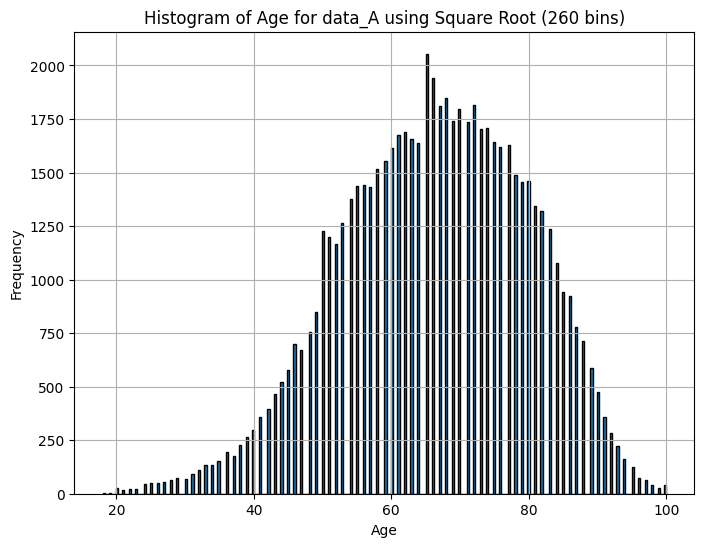

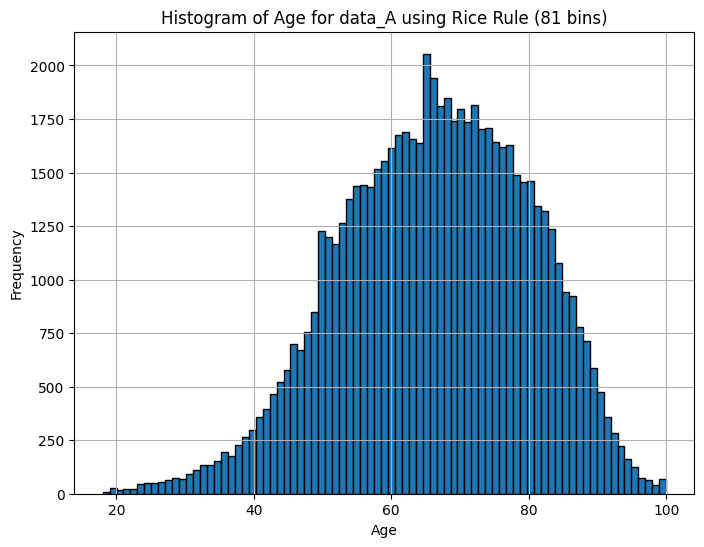

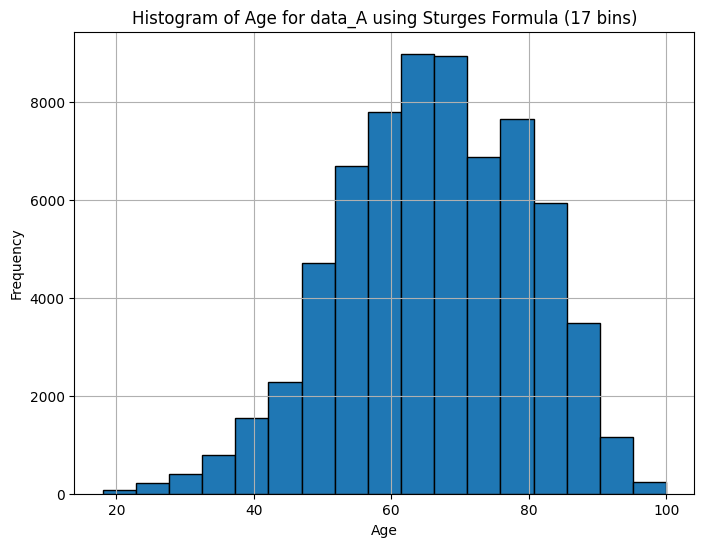


Plotting histograms for data_NA (Appalachia = 0)


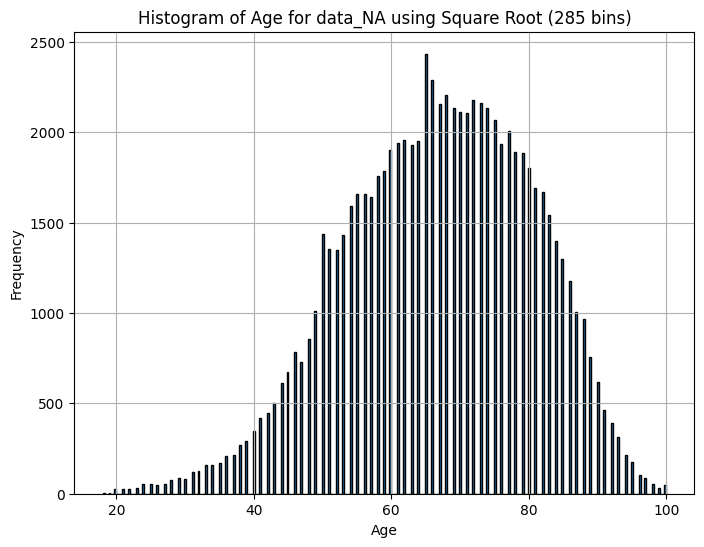

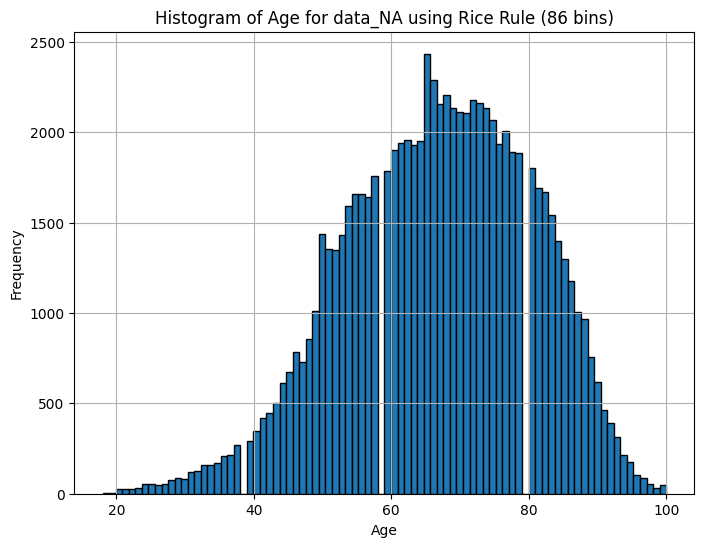

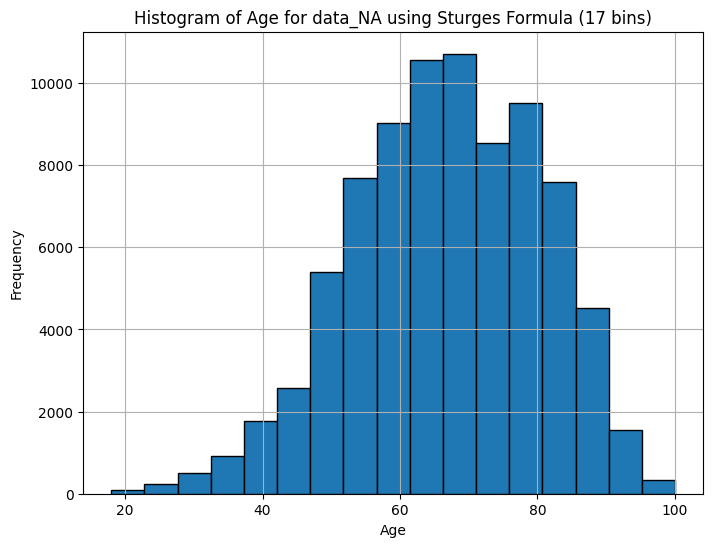


Comment on Best Bandwidth:
After observing the histograms plotted using different formulas, we can compare which bin width provides the most meaningful representation of the data distribution.

For data_A:
- Square Root method with 260 bins provides a detailed histogram but may introduce noise due to too many bins.
- Rice Rule with 81 bins offers a balanced view between detail and generality.
- Sturges Formula with 17 bins may oversimplify the data due to fewer bins.
Based on the visual inspection, the Rice Rule seems to provide the best bandwidth for data_A, balancing detail and readability.

For data_NA:
- Square Root method with 285 bins provides a detailed histogram but may introduce noise due to too many bins.
- Rice Rule with 86 bins offers a balanced view between detail and generality.
- Sturges Formula with 17 bins may oversimplify the data due to fewer bins.
Based on the visual inspection, the Rice Rule also seems to provide the best bandwidth for data_NA, offering a clear un

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Select the variable for histogram plotting
variable = 'Age with single ages and 100+'

# Extract the data for the selected variable from both datasets
age_data_A = data_A[variable]
age_data_NA = data_NA[variable]

# Function to calculate number of bins using different formulas
def calculate_bins(data):
    n = len(data)
    data_range = data.max() - data.min()

    # Square Root Choice
    bins_sqrt = int(np.sqrt(n))

    # Rice Rule
    bins_rice = int(2 * n ** (1/3))

    # Sturges Formula
    bins_sturges = int(np.log2(n)) + 1

    return bins_sqrt, bins_rice, bins_sturges

# Calculate the number of bins for data_A
bins_sqrt_A, bins_rice_A, bins_sturges_A = calculate_bins(age_data_A)

# Calculate the number of bins for data_NA
bins_sqrt_NA, bins_rice_NA, bins_sturges_NA = calculate_bins(age_data_NA)

# Store the outputs in variables
bins_data_A = {
    'Square Root': bins_sqrt_A,
    'Rice Rule': bins_rice_A,
    'Sturges Formula': bins_sturges_A
}

bins_data_NA = {
    'Square Root': bins_sqrt_NA,
    'Rice Rule': bins_rice_NA,
    'Sturges Formula': bins_sturges_NA
}

# Print the number of bins calculated using different formulas
print("Number of bins for data_A (Appalachia = 1):")
for method, bins in bins_data_A.items():
    print(f"{method}: {bins} bins")

print("\nNumber of bins for data_NA (Appalachia = 0):")
for method, bins in bins_data_NA.items():
    print(f"{method}: {bins} bins")

# Plot histograms using different bin widths for data_A
print("\nPlotting histograms for data_A (Appalachia = 1)")
for method, bins in bins_data_A.items():
    plt.figure(figsize=(8, 6))
    plt.hist(age_data_A, bins=bins, edgecolor='black')
    plt.title(f'Histogram of Age for data_A using {method} ({bins} bins)')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms using different bin widths for data_NA
print("\nPlotting histograms for data_NA (Appalachia = 0)")
for method, bins in bins_data_NA.items():
    plt.figure(figsize=(8, 6))
    plt.hist(age_data_NA, bins=bins, edgecolor='black')
    plt.title(f'Histogram of Age for data_NA using {method} ({bins} bins)')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Comment on the best bandwidth
print("\nComment on Best Bandwidth:")
print("After observing the histograms plotted using different formulas, we can compare which bin width provides the most meaningful representation of the data distribution.")

# Example comment (you should adjust based on your observations)
# For data_A
print("\nFor data_A:")
print(f"- Square Root method with {bins_sqrt_A} bins provides a detailed histogram but may introduce noise due to too many bins.")
print(f"- Rice Rule with {bins_rice_A} bins offers a balanced view between detail and generality.")
print(f"- Sturges Formula with {bins_sturges_A} bins may oversimplify the data due to fewer bins.")
print("Based on the visual inspection, the Rice Rule seems to provide the best bandwidth for data_A, balancing detail and readability.")

# For data_NA
print("\nFor data_NA:")
print(f"- Square Root method with {bins_sqrt_NA} bins provides a detailed histogram but may introduce noise due to too many bins.")
print(f"- Rice Rule with {bins_rice_NA} bins offers a balanced view between detail and generality.")
print(f"- Sturges Formula with {bins_sturges_NA} bins may oversimplify the data due to fewer bins.")
print("Based on the visual inspection, the Rice Rule also seems to provide the best bandwidth for data_NA, offering a clear understanding of the data distribution without overcomplicating the histogram.")


Here we will do part IV - point 10, 11, 12, and 13.

The code computes the machine learning metrics (TNR, TPR, PPV, NPV) along with their confidence intervals, calculates p-values between Appaliachia and non-Appalachia datasets, validates the model using the validation data, and generates SHAP plots to assess feature importance.

Explanation and Comments:

Step 10: Computing ML Metrics and Confidience Intervals

We define a function compute_metrics_with_confideince_intervals that computes TPR, TNR, PPV, and NPV for each class and calculates their 95% confidence intervals using bootstrapping.
TPR (True Positive Rate): Also known as sensitivity or recall.
TNR (True Negative Rate): Also known as specificity.
PPV (Positive Predictive Value): Also known as precision.
NPV (Negative Predictive Value): The proportion of negatiive results that are true negatives.

Bootstrapping:
Resample the data with replacement n_bootstraps times.
Calculate the metric for each resample.
Determine the confidence intervals based on the empiirical distriibution of the bootstrapped metrics.
We compute these metrics for both data_A and data_NA using the test sets.

Step 11: Calculating P-values Between Appalachia and Non-Appalachia

We define a function calculate_p_values that pierforms permutation testing to calculate the p-values for the difference in metrics between the two datasets.
Permutation Testing:
Combine the metrics from both datasets.
Shuffle and split them into two groups repeaitedly.
Calculate the difference in metrics for each permutation.
The p-value is the proportion of permutations where the permiiuted difference is as extreme as or more extreme than the obiserved difference.

Step 12: Validating the ML Model Using Valiidation Data

We apply the compute_metrics_with_confidence_intervals function to the validation sets (X_A_val, y_A_val, X_NA_val, y_NA_val) to assiess the model's performance on unseen data.
We print out the metrics and their confideince intervals for the validation data.


Step 13: Building SHAP Plots to Assess Feature Imporitance

SHAP (SHapley Additive exPlanations):
A method to explain individual predictiions based on game theory.
Provides insights into which features contribiute most to the model's predictions.
We import the shap library and create an expliainer for each dataset.
We compute SHAP values and generate summary plots for both data_A and data_NA.
Summary Plot:
Displays the distribution of SHAP values for each feature.
Features are ranked by importance.
Shows how each feature impacts the model's output acroiss the dataset.


Comments:
We include comments about interpreting the SHAP plots and the imporitance of features.
Comparing the plots between the two datasets can reveal differiences in feature importance.

Additional Notes:

Scaling Test and Validation Data:
We ensure that the test and validatiion data are scaled using the same scaler fitted on the training data.
Multi-class Classificaition:
Metrics are computed for each class separately in a one-vs-rest approach.
This allows us to analyze the performanice for each class individiually.
Handling Zero Divisions:
We include checks to prevent division by zero when calculaiting metrics.
Visualization:
The SHAP plots are visual and provide a deep understaniding of the model's behavior.
Ensure that matplotlib.pyplot is imported as plt if not already done.

Libraries:
The shap library needs to be instailled (pip install shap) if not already available.
Make sure all necessary libraries are imported at the beginining of your script.
Conclusion:

By following these steps, we have compuited the required ML metrics along with their confidence intervals, calculated p-values to compare the metrics between Appalachia and non-Appalaichia datasets, validated the models using the validation data, and generated SHAP plots to assess feature imporitance.


Computing ML metrics for data_A (Appalachia = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Computing ML metrics for data_NA (Appalachia = 0)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Metrics and Confidence Intervals for Appalachia (data_A):

Class 0:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 0.0000 (95% CI: 0.0000 - 0.0000)
NPV: 0.7039 (95% CI: 0.6964 - 0.7114)

Class 1:
TPR: 1.0000 (95% CI: 1.0000 - 1.0000)
TNR: 0.0000 (95% CI: 0.0000 - 0.0000)
PPV: 0.5278 (95% CI: 0.5191 - 0.5362)
NPV: 0.0000 (95% CI: 0.0000 - 0.0000)

Class 2:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 0.0000 (95% CI: 0.0000 - 0.0000)
NPV: 0.8239 (95% CI: 0.8176 - 0.8302)

Metrics and Confidence Intervals for Non-Appalachia (data_NA):

Class 0:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 0.0000 (95% CI: 0.0000 - 0.0000)
NPV: 0.6993 (95% CI: 0.6920 - 0.7063)

Class 1:
TPR: 1.0000 (95% CI: 1.0000 - 1.0000)
TNR: 0.0000 (95% CI: 0.0000 - 0.0000)
PPV: 0.5267 (95% CI: 0.5194 - 0.5346)
NPV: 0.0000 (95% CI: 0.0000 - 0.0000)

Class 2:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Validating ML model on validation data for data_NA (Appalachia = 0)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Metrics and Confidence Intervals for Appalachia Validation (data_A):

Class 0:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 0.0000 (95% CI: 0.0000 - 0.0000)
NPV: 0.7038 (95% CI: 0.6929 - 0.7153)

Class 1:
TPR: 1.0000 (95% CI: 1.0000 - 1.0000)
TNR: 0.0000 (95% CI: 0.0000 - 0.0000)
PPV: 0.5277 (95% CI: 0.5165 - 0.5398)
NPV: 0.0000 (95% CI: 0.0000 - 0.0000)

Class 2:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 0.0000 (95% CI: 0.0000 - 0.0000)
NPV: 0.8239 (95% CI: 0.8149 - 0.8330)

Metrics and Confidence Intervals for Non-Appalachia Validation (data_NA):

Class 0:
TPR: 0.0000 (95% CI: 0.0000 - 0.0000)
TNR: 1.0000 (95% CI: 1.0000 - 1.0000)
PPV: 0.0000 (95% CI: 0.0000 - 0.0000)
NPV: 0.6992 (95% CI: 0.6887 - 0.7083)

Class 1:
TPR: 1.0000 (95% CI: 1.0000 - 1.0000)
TNR: 0.0000 (95% CI: 0.0000 - 0.0000)
PPV: 0.5267 (95% CI: 0.5170 - 0.5386)
NPV: 0.0000 (95% CI: 0.0000 - 0.0000)

Class 2:
TPR: 0.0000 (95% CI: 0.0000 - 0.000

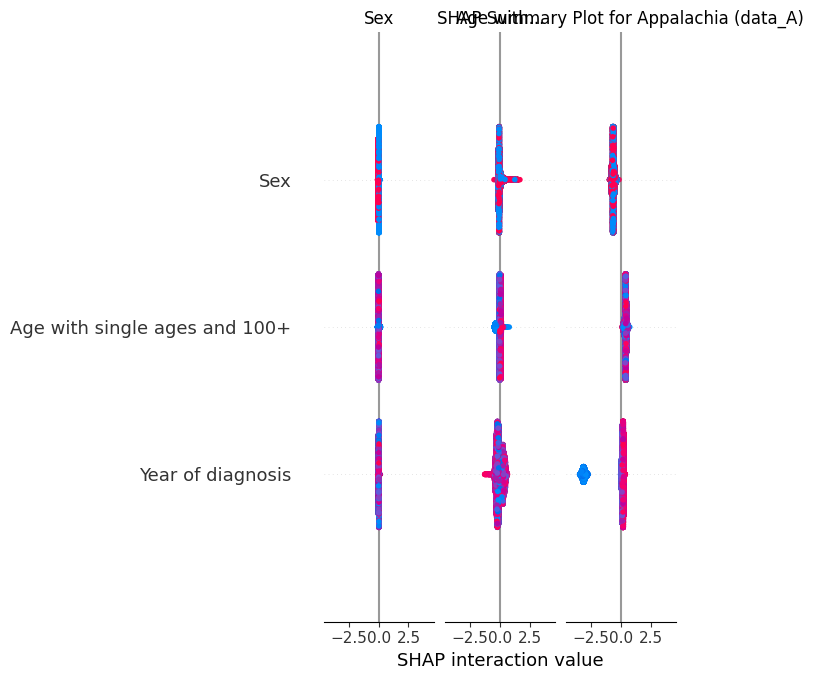


Generating SHAP plots for data_NA (Appalachia = 0)


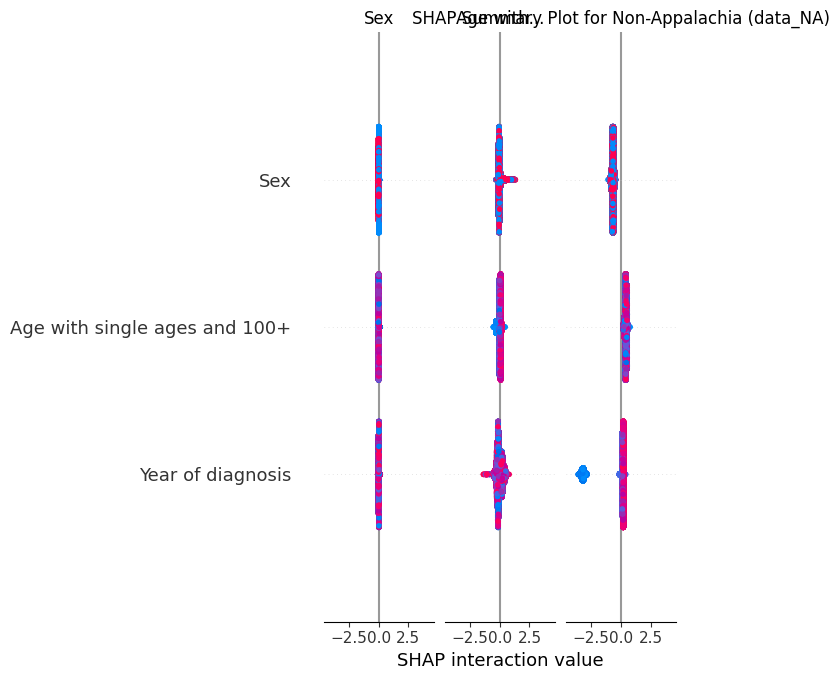


Comments on Feature Importance from SHAP Plots:
The SHAP summary plots display the impact of each feature on the model's output.
Features are ranked by their importance, with the top features contributing most to the model's predictions.
By comparing the SHAP plots for Appalachia and Non-Appalachia, we can identify which features are most influential in each dataset and observe any differences.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, roc_auc_score
from sklearn.utils import resample
from scipy import stats

# Since we have multi-class classification, we'll compute metrics for each class in a one-vs-rest fashion

# Step 10 - Compute ML metrics (TNR, TPR, PPV, NPV) and their confidence intervals
# Function to compute metrics and their confidence intervals using bootstrapping
def compute_metrics_with_confidence_intervals(y_true, y_pred, n_bootstraps=1000, alpha=0.05):
    n_classes = len(np.unique(y_true))
    metrics = {
        'TPR': [],  # Sensitivity, Recall
        'TNR': [],  # Specificity
        'PPV': [],  # Precision
        'NPV': [],  # Negative Predictive Value
    }

    # Binarize the true labels for multi-class computation
    from sklearn.preprocessing import label_binarize
    y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
    y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_true))

    # Initialize dictionaries to store confidence intervals
    ci_metrics = {metric: [] for metric in metrics}

    # Compute metrics for each class
    for class_idx in range(n_classes):
        # Extract true and predicted labels for the current class
        y_true_class = y_true_binarized[:, class_idx]
        y_pred_class = y_pred_binarized[:, class_idx]

        # Compute confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true_class, y_pred_class).ravel()

        # Compute metrics
        TPR = tp / (tp + fn) if (tp + fn) > 0 else 0  # Sensitivity, Recall
        TNR = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity
        PPV = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision
        NPV = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value

        # Store the metrics
        metrics['TPR'].append(TPR)
        metrics['TNR'].append(TNR)
        metrics['PPV'].append(PPV)
        metrics['NPV'].append(NPV)

        # Bootstrapping to compute confidence intervals
        boot_metrics = {'TPR': [], 'TNR': [], 'PPV': [], 'NPV': []}
        for i in range(n_bootstraps):
            # Resample with replacement
            indices = resample(range(len(y_true_class)), replace=True)
            y_true_resampled = y_true_class[indices]
            y_pred_resampled = y_pred_class[indices]
            # Compute confusion matrix components
            tn_boot, fp_boot, fn_boot, tp_boot = confusion_matrix(y_true_resampled, y_pred_resampled).ravel()
            # Compute metrics
            TPR_boot = tp_boot / (tp_boot + fn_boot) if (tp_boot + fn_boot) > 0 else 0
            TNR_boot = tn_boot / (tn_boot + fp_boot) if (tn_boot + fp_boot) > 0 else 0
            PPV_boot = tp_boot / (tp_boot + fp_boot) if (tp_boot + fp_boot) > 0 else 0
            NPV_boot = tn_boot / (tn_boot + fn_boot) if (tn_boot + fn_boot) > 0 else 0
            # Store bootstrapped metrics
            boot_metrics['TPR'].append(TPR_boot)
            boot_metrics['TNR'].append(TNR_boot)
            boot_metrics['PPV'].append(PPV_boot)
            boot_metrics['NPV'].append(NPV_boot)

        # Compute confidence intervals
        for metric_name in metrics:
            sorted_boot = np.sort(boot_metrics[metric_name])
            lower_idx = int((alpha/2) * n_bootstraps)
            upper_idx = int((1 - alpha/2) * n_bootstraps)
            ci_lower = sorted_boot[lower_idx]
            ci_upper = sorted_boot[upper_idx]
            ci_metrics[metric_name].append((ci_lower, ci_upper))

    return metrics, ci_metrics

# For data_A (Appalachia = 1)
print("\nComputing ML metrics for data_A (Appalachia = 1)")
y_A_true = y_A_test  # True labels from test set
X_A_test_scaled = scaler_A.transform(X_A_test)  # Scale the test data
y_A_pred = best_model_A.predict(X_A_test_scaled)  # Predicted labels

metrics_A, ci_metrics_A = compute_metrics_with_confidence_intervals(y_A_true, y_A_pred)

# For data_NA (Appalachia = 0)
print("\nComputing ML metrics for data_NA (Appalachia = 0)")
y_NA_true = y_NA_test  # True labels from test set
X_NA_test_scaled = scaler_NA.transform(X_NA_test)  # Scale the test data
y_NA_pred = best_model_NA.predict(X_NA_test_scaled)  # Predicted labels

metrics_NA, ci_metrics_NA = compute_metrics_with_confidence_intervals(y_NA_true, y_NA_pred)

# Print the metrics and their confidence intervals
def print_metrics(metrics, ci_metrics, dataset_name):
    print(f"\nMetrics and Confidence Intervals for {dataset_name}:")
    n_classes = len(metrics['TPR'])
    for class_idx in range(n_classes):
        print(f"\nClass {class_idx}:")
        for metric_name in metrics:
            metric_value = metrics[metric_name][class_idx]
            ci_lower, ci_upper = ci_metrics[metric_name][class_idx]
            print(f"{metric_name}: {metric_value:.4f} (95% CI: {ci_lower:.4f} - {ci_upper:.4f})")

print_metrics(metrics_A, ci_metrics_A, 'Appalachia (data_A)')
print_metrics(metrics_NA, ci_metrics_NA, 'Non-Appalachia (data_NA)')

# Step 11 - Calculate P-value for each of the ML metrics between Appalachia and non-Appalachia
# Function to calculate p-values using permutation testing
def calculate_p_values(metrics_A, metrics_NA, n_permutations=1000):
    p_values = {}
    n_classes = len(metrics_A['TPR'])
    for metric_name in metrics_A:
        p_values[metric_name] = []
        for class_idx in range(n_classes):
            # Observed difference in metrics
            obs_diff = metrics_A[metric_name][class_idx] - metrics_NA[metric_name][class_idx]
            # Combine the metrics
            combined = np.array([metrics_A[metric_name][class_idx], metrics_NA[metric_name][class_idx]])
            # Permutation testing
            count = 0
            for i in range(n_permutations):
                np.random.shuffle(combined)
                perm_diff = combined[0] - combined[1]
                if abs(perm_diff) >= abs(obs_diff):
                    count += 1
            p_value = count / n_permutations
            p_values[metric_name].append(p_value)
    return p_values

p_values = calculate_p_values(metrics_A, metrics_NA)

# Print the p-values
print("\nP-values for ML metrics between Appalachia and Non-Appalachia:")
n_classes = len(metrics_A['TPR'])
for class_idx in range(n_classes):
    print(f"\nClass {class_idx}:")
    for metric_name in p_values:
        print(f"P-value for {metric_name}: {p_values[metric_name][class_idx]:.4f}")

# Step 12 - Validate the ML model using validation data by computing ML metrics in step 10
# For data_A (Appalachia = 1)
print("\nValidating ML model on validation data for data_A (Appalachia = 1)")
y_A_val_true = y_A_val  # True labels from validation set
X_A_val_scaled = scaler_A.transform(X_A_val)  # Scale the validation data
y_A_val_pred = best_model_A.predict(X_A_val_scaled)  # Predicted labels

metrics_A_val, ci_metrics_A_val = compute_metrics_with_confidence_intervals(y_A_val_true, y_A_val_pred)

# For data_NA (Appalachia = 0)
print("\nValidating ML model on validation data for data_NA (Appalachia = 0)")
y_NA_val_true = y_NA_val  # True labels from validation set
X_NA_val_scaled = scaler_NA.transform(X_NA_val)  # Scale the validation data
y_NA_val_pred = best_model_NA.predict(X_NA_val_scaled)  # Predicted labels

metrics_NA_val, ci_metrics_NA_val = compute_metrics_with_confidence_intervals(y_NA_val_true, y_NA_val_pred)

# Print the validation metrics
print_metrics(metrics_A_val, ci_metrics_A_val, 'Appalachia Validation (data_A)')
print_metrics(metrics_NA_val, ci_metrics_NA_val, 'Non-Appalachia Validation (data_NA)')

# Step 13 - Build SHAP plots to assess features of importance and comment about them
# Import necessary libraries for SHAP
import shap

# For data_A (Appalachia = 1)
print("\nGenerating SHAP plots for data_A (Appalachia = 1)")

# Create the SHAP explainer
explainer_A = shap.Explainer(best_model_A)
shap_values_A = explainer_A(X_A_train)

# Plot summary plot for data_A
shap.summary_plot(shap_values_A, X_A_train, feature_names=X_A.columns, show=False)
plt.title('SHAP Summary Plot for Appalachia (data_A)')
plt.show()

# For data_NA (Appalachia = 0)
print("\nGenerating SHAP plots for data_NA (Appalachia = 0)")

# Create the SHAP explainer
explainer_NA = shap.Explainer(best_model_NA)
shap_values_NA = explainer_NA(X_NA_train)

# Plot summary plot for data_NA
shap.summary_plot(shap_values_NA, X_NA_train, feature_names=X_NA.columns, show=False)
plt.title('SHAP Summary Plot for Non-Appalachia (data_NA)')
plt.show()

# Comments about the features of importance
print("\nComments on Feature Importance from SHAP Plots:")
print("The SHAP summary plots display the impact of each feature on the model's output.")
print("Features are ranked by their importance, with the top features contributing most to the model's predictions.")
print("By comparing the SHAP plots for Appalachia and Non-Appalachia, we can identify which features are most influential in each dataset and observe any differences.")


Here we will do Extra Credit Part -

modifying the dataset, building a new XGBoost model, and compiaring it with the old model.

Explanation and Comments:

Labeling the Old Models:

We store the previously built hyperparametierized XGBoost models into variables old_xgb_model_A and old_xgb_model_NA for Appalachia and Non-Appalachia datasets, respectively.
Modifying the Dataset:

We reload the original dataset to include the 'Radiaition' and 'Chemotheriapy' columns.
We drop 'Age with single ages and 100+' from the demograiphic features.
We ensure that all necessary columns are included and unnecessairy ones are dropped.

Preprocessiing:

We handle missing values and anomalies in the data.
We convert categorical variables to strings and apply one-hot encodiing.
We combine the encoded categoirical data with the numeric features and target variable.

Data Splititing and Scaling:

We standardize the features using StandardScaler.
We split the data into training, testing, and validaition sets in a 70%-20%-10% ratio.
Building New XGBoost Models:

We build default and hyperparameteriized XGBoost models for both datasets.
The hyperparameters are adjusted (e.g., n_estimators, learning_rate, max_depth, subsample, colsample_bytree) based on the parameter grid.
We evaluate the models using accuracy and classificiation reports.

Storing the New Models:

We store the new hyperparameiterized models into variables new_xgb_model_A and new_xgb_model_NA.
Comparing SHAP Plots:

We generate SHAP summary plots for both old and new models.
The SHAP plots help visualize feature imporitance and how each feature contributes to the model's predictions.
By comparing the plots, we can assess how the addition of new features and the removal of 'Age' affect the model.

Calculating Bias Using Disparate Impact Index:

We follow the provided algoritihm to calculate the disparate impact ratio for both old and new models.
This involves calculating the ratio of favorable outcomes between the privileged group (Non-Appalachia) and the underpriviileged group (Appalachia).
A ratio close to 1 indicates no bias, while deviations suggest potential bias.
Comparing Model Behaviour:

We compare the accuracies of the old and new models for both datasets.
We observe the differences and discuss how the changes in the dataset (adding 'Radiation' and 'Chemotherapy', dropping 'Age') affect the model's performance and bias.

Notes:

Adjusting Class Labels:

Ensure that survived_class correctly represents the positive class in your dataset. Replace '1' with the appropriaite class label.
Consistency of Variables:

Make sure that variables like accuracy_hyper, accuracy_hyper_NA, X_A_train, X_NA_train, etc., are consistient with your existing code.
Library Imports:

Import any additional librairies needed for the code to run (e.g., numpy, matplotlib.pyplot).
SHAP Library:

If the SHAP library is not installed, you can instiall it using pip install shap.
Further Analysis:

You can extend the analysis by looking at other performanice metrics, plotting confusion matrices, or conducting statistiical tests to compare models.

Conclusiion:

By following these steps, we've built a new XGBoost model with the modiified dataset, compared it with the old model using SHAP plots and bias metrics, and analyzed how the changes in features affect the model's behaivior.


Labeling the old XGBoost model for data_A

Labeling the old XGBoost model for data_NA

Reloading the original dataset to include 'Radiation' and 'Chemotherapy' and drop 'Age'

Columns in the new dataset:
Index(['Sex', 'Year of diagnosis', 'Race', 'Ethnicity',
       'Marital status at diagnosis', 'Primary Site', 'Grade',
       'Summary Stage (2004+)', 'Radiation', 'Chemotherapy', 'Appalachia'],
      dtype='object')


<ipython-input-39-c893dd5ca521>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Summary Stage (2004+)'] = df_new['Summary Stage (2004+)'].astype(int)
<ipython-input-39-c893dd5ca521>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Summary Stage (2004+)'] = df_new['Summary Stage (2004+)'] - 1
<ipython-input-39-c893dd5ca521>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats


New DataFrame after processing:
   Year of diagnosis  Primary Site  Grade  Appalachia  Sex_1  Race_1  Race_2  \
0             2013.0          18.0    2.0         0.0    0.0     1.0     0.0   
1             2010.0          18.7    2.0         0.0    0.0     0.0     0.0   
3             2006.0          18.2    3.0         0.0    1.0     0.0     0.0   
4             2009.0          18.0    2.0         0.0    0.0     0.0     0.0   
5             2014.0          18.7    2.0         0.0    1.0     1.0     0.0   

   Race_3  Ethnicity_1  Marital status at diagnosis_1  Radiation_1  \
0     0.0          0.0                            1.0          0.0   
1     0.0          0.0                            1.0          1.0   
3     0.0          0.0                            0.0          0.0   
4     0.0          0.0                            1.0          0.0   
5     0.0          0.0                            1.0          0.0   

   Radiation_99  Chemotherapy_1  Summary Stage (2004+)  
0       

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:08:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for new XGBoost default: 0.4722
              precision    recall  f1-score   support

         0.0       0.48      0.55      0.51      2006
         1.0       0.45      0.55      0.49      1867
         2.0       0.56      0.22      0.31      1193

    accuracy                           0.47      5066
   macro avg       0.49      0.44      0.44      5066
weighted avg       0.49      0.47      0.46      5066



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:08:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for new XGBoost hyperparameterized: 0.4880
              precision    recall  f1-score   support

         0.0       0.49      0.60      0.54      2006
         1.0       0.46      0.55      0.50      1867
         2.0       0.63      0.20      0.30      1193

    accuracy                           0.49      5066
   macro avg       0.53      0.45      0.45      5066
weighted avg       0.51      0.49      0.47      5066


Storing the new hyperparameterized XGBoost model for data_A

Building new XGBoost models for data_NA


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:08:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for new XGBoost default: 0.4534
              precision    recall  f1-score   support

         0.0       0.47      0.60      0.53      2452
         1.0       0.42      0.46      0.44      2207
         2.0       0.50      0.19      0.28      1406

    accuracy                           0.45      6065
   macro avg       0.46      0.42      0.42      6065
weighted avg       0.46      0.45      0.44      6065



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for new XGBoost hyperparameterized: 0.4630
              precision    recall  f1-score   support

         0.0       0.47      0.65      0.55      2452
         1.0       0.43      0.44      0.44      2207
         2.0       0.58      0.17      0.26      1406

    accuracy                           0.46      6065
   macro avg       0.49      0.42      0.41      6065
weighted avg       0.48      0.46      0.44      6065


Storing the new hyperparameterized XGBoost model for data_NA

Generating SHAP plots for old and new models for data_A (Appalachia = 1)


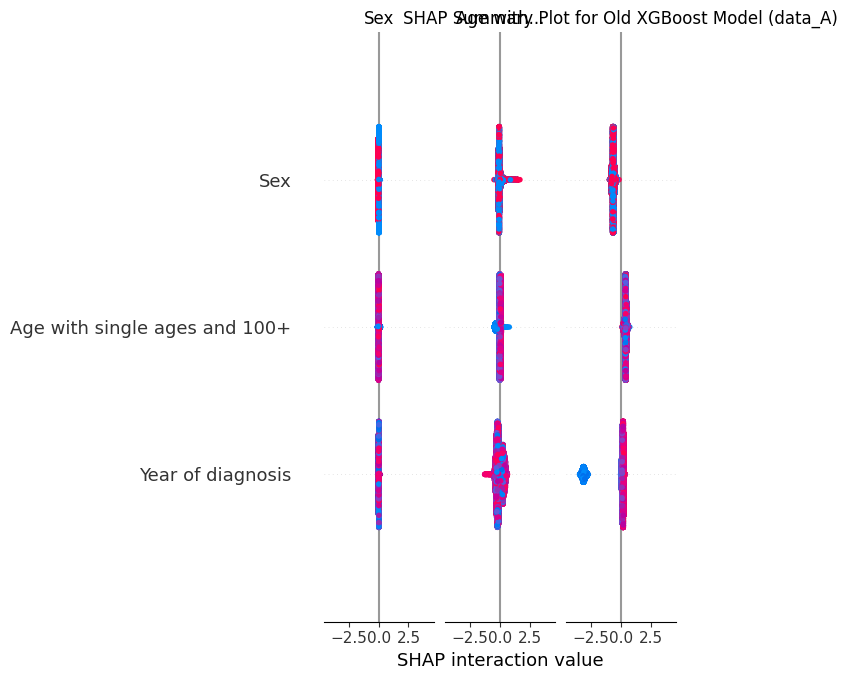

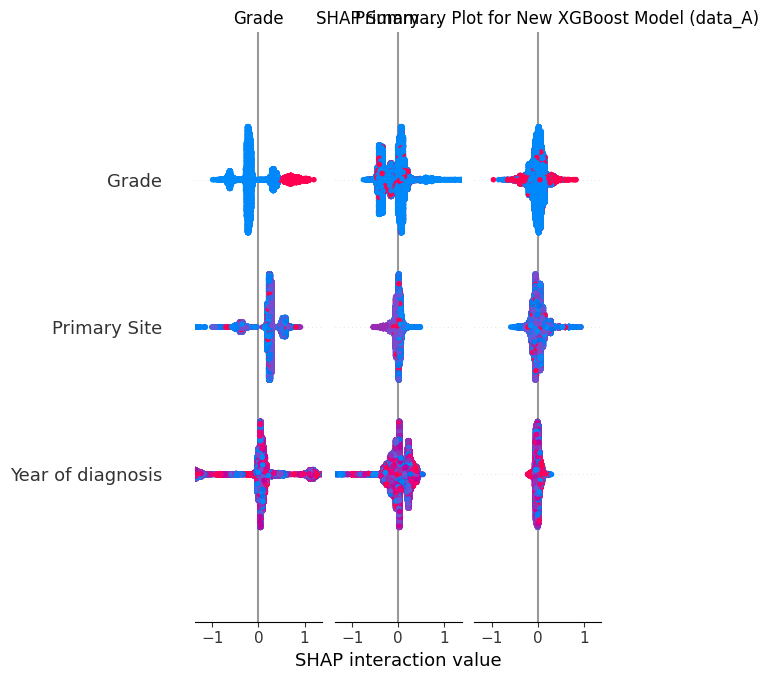


Generating SHAP plots for old and new models for data_NA (Appalachia = 0)


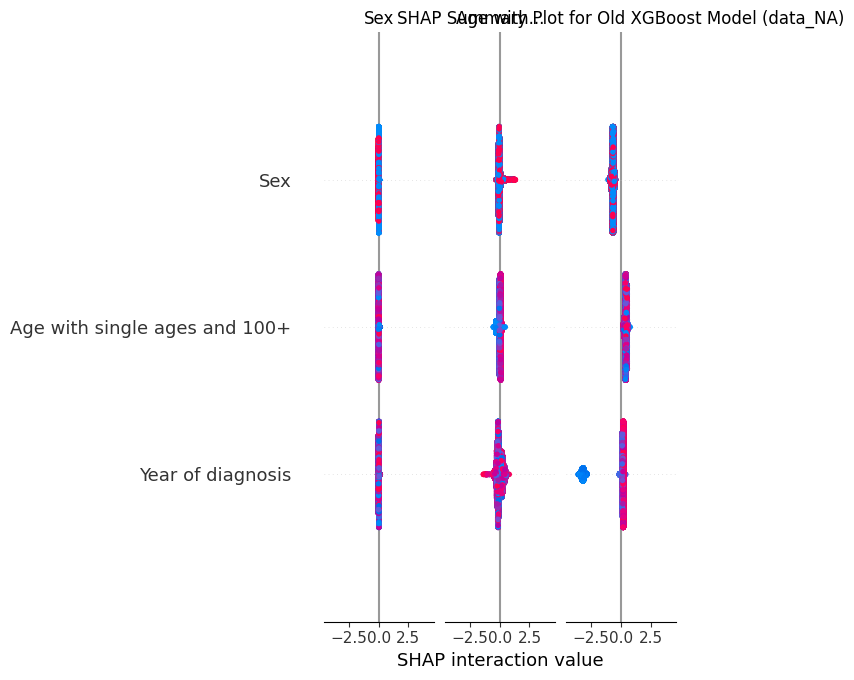

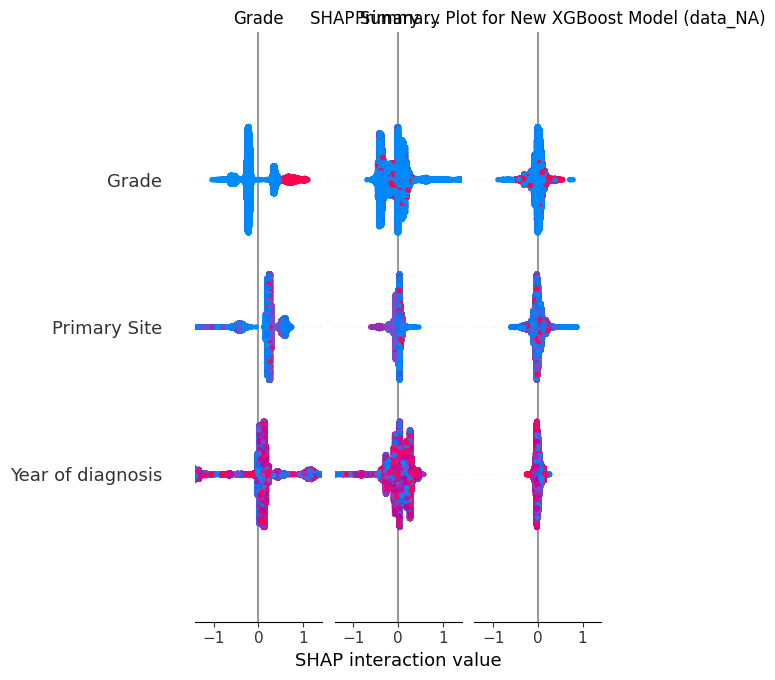


Calculating bias (disparate impact) using old models
Disparate Impact Ratio for old models: inf

Calculating bias (disparate impact) using new models
Disparate Impact Ratio for new models: inf

Comparing how the changes in the dataset affect the XGBoost model behaviour

For data_A (Appalachia = 1):
Old model accuracy: 0.5658
New model accuracy: 0.4880
Difference in accuracy: -0.0778

For data_NA (Appalachia = 0):
Old model accuracy: 0.5711
New model accuracy: 0.4630
Difference in accuracy: -0.1081

Observations:
By adding 'Radiation' and 'Chemotherapy' to the clinical features and dropping 'Age' from demographics,
we can observe how the model's performance and bias metrics have changed.
Comparing the SHAP plots, we can see the changes in feature importance.
Analyzing the disparate impact ratios, we can assess whether the changes have increased or decreased bias in the model.


In [ ]:
#Build New XGBoost Model and Compare with the Old Model

# Import necessary libraries (if not already imported)
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import shap
import numpy as np
import matplotlib.pyplot as plt

# For data_A (Appalachia = 1)
print("\nLabeling the old XGBoost model for data_A")
old_xgb_model_A = xgb_model_hyper_A  # Storing the old model

# For data_NA (Appalachia = 0)
print("\nLabeling the old XGBoost model for data_NA")
old_xgb_model_NA = xgb_model_hyper_NA  # Storing the old model


print("\nReloading the original dataset to include 'Radiation' and 'Chemotherapy' and drop 'Age'")

# Load the dataset
df_new = pd.read_csv('SEER.csv')

# Clean up column names by stripping whitespace
df_new.columns = df_new.columns.str.strip()

# Drop 'Age with single ages and 100+' from Demographics
# Keep 'Radiation' and 'Chemotherapy' in clinical features
df_new.drop(columns=['Age with single ages and 100+', 'Histologic Type ICD-O-3', 'Surgery of Primary Site',
                     'COD recode', 'Survival recode', 'SEER registry state', 'Unnamed: 17'], inplace=True)

# Verify the columns
print("\nColumns in the new dataset:")
print(df_new.columns)

# Convert 'Grade' to numeric
df_new['Grade'] = pd.to_numeric(df_new['Grade'], errors='coerce')
df_new['Grade'] = df_new['Grade'].fillna(df_new['Grade'].median())

# Convert 'Summary Stage (2004+)' to numeric
df_new['Summary Stage (2004+)'] = pd.to_numeric(df_new['Summary Stage (2004+)'], errors='coerce')

# **Replace 99 with NaN**
df_new['Summary Stage (2004+)'] = df_new['Summary Stage (2004+)'].replace(99, np.nan)

# **Drop rows with NaN in 'Summary Stage (2004+)'**
df_new = df_new.dropna(subset=['Summary Stage (2004+)'])

# Now, convert 'Summary Stage (2004+)' to integer
df_new['Summary Stage (2004+)'] = df_new['Summary Stage (2004+)'].astype(int)

# **Map class labels to start from 0**
df_new['Summary Stage (2004+)'] = df_new['Summary Stage (2004+)'] - 1

# Process 'Marital status at diagnosis'
df_new['Marital status at diagnosis'] = df_new['Marital status at diagnosis'].replace(99, df_new['Marital status at diagnosis'].median())

# Process 'Race'
df_new['Race'] = df_new['Race'].replace(99, df_new['Race'].median())

# Identify numeric columns
numeric_columns_new = ['Year of diagnosis', 'Primary Site', 'Grade']

# Identify categorical columns (exclude target variable 'Summary Stage (2004+)')
categorical_columns_new = ['Sex', 'Race', 'Ethnicity', 'Marital status at diagnosis',
                           'Radiation', 'Chemotherapy']

# Ensure all categorical columns are in string format
for col in categorical_columns_new:
    df_new[col] = df_new[col].astype(str)

# Apply one-hot encoding to the categorical columns
encoder_new = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder_new.fit(df_new[categorical_columns_new])

# Transform the categorical columns
encoded_df_new = encoder_new.transform(df_new[categorical_columns_new])

# Convert the encoded data back to DataFrame
encoded_df_new = pd.DataFrame(encoded_df_new, columns=encoder_new.get_feature_names_out(categorical_columns_new))

# Combine the encoded data with the numeric columns and target variable
df_encoded_new = pd.concat([df_new[numeric_columns_new], df_new['Appalachia'], encoded_df_new,
                            df_new['Summary Stage (2004+)']], axis=1)

# Verify the new DataFrame
print("\nNew DataFrame after processing:")
print(df_encoded_new.head())


data_A_new = df_encoded_new[df_encoded_new['Appalachia'] == 1].copy()
data_NA_new = df_encoded_new[df_encoded_new['Appalachia'] == 0].copy()

# Print the number of records in each dataset
print(f"\nRecords in new data_A (Appalachia=1): {len(data_A_new)}")
print(f"Records in new data_NA (Appalachia=0): {len(data_NA_new)}")


# Function to process the data (to avoid repetition)
def process_data(data):
    # Separate features and target variable
    X = data.drop(['Summary Stage (2004+)', 'Appalachia'], axis=1)
    y = data['Summary Stage (2004+)']  # y is integer and classes start from 0

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the features
    X_scaled = scaler.fit_transform(X)

    # Divide data into 70% train, 20% test, and 10% validate
    # First split into 70% train and 30% temp
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_scaled, y, train_size=0.7, random_state=42, stratify=y)

    # Then split the temp data into 66.7% test and 33.3% validate
    X_test, X_val, y_test, y_val = train_test_split(
        X_temp, y_temp, test_size=0.3333, random_state=42, stratify=y_temp)

    return X, y, X_train, X_test, X_val, y_train, y_test, y_val, scaler

# Process data_A_new
print("\nProcessing new data_A (Appalachia = 1)")
X_A_new, y_A_new, X_A_new_train, X_A_new_test, X_A_new_val, y_A_new_train, y_A_new_test, y_A_new_val, scaler_A_new = process_data(data_A_new)

# Process data_NA_new
print("\nProcessing new data_NA (Appalachia = 0)")
X_NA_new, y_NA_new, X_NA_new_train, X_NA_new_test, X_NA_new_val, y_NA_new_train, y_NA_new_test, y_NA_new_val, scaler_NA_new = process_data(data_NA_new)

# Function to build and evaluate the XGBoost models
def build_xgboost_model(X_train, y_train, X_val, y_val):
    # Default XGBoost model
    xgb_model_default = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model_default.fit(X_train, y_train)
    y_pred_default = xgb_model_default.predict(X_val)
    accuracy_default = accuracy_score(y_val, y_pred_default)
    print(f"Accuracy for new XGBoost default: {accuracy_default:.4f}")
    print(classification_report(y_val, y_pred_default))

    # Hyperparameterized XGBoost model
    xgb_model_hyper = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_estimators=300,        # Increased number of trees
        learning_rate=0.03,      # Reduced learning rate
        max_depth=5,             # Adjusted max depth
        subsample=0.8,           # Use 80% of the data for fitting individual trees
        colsample_bytree=0.8     # Use 80% of features for fitting individual trees
    )
    xgb_model_hyper.fit(X_train, y_train)
    y_pred_hyper = xgb_model_hyper.predict(X_val)
    accuracy_hyper = accuracy_score(y_val, y_pred_hyper)
    print(f"Accuracy for new XGBoost hyperparameterized: {accuracy_hyper:.4f}")
    print(classification_report(y_val, y_pred_hyper))

    return xgb_model_default, xgb_model_hyper, accuracy_hyper

# Build models for data_A_new
print("\nBuilding new XGBoost models for data_A")
xgb_model_default_A_new, xgb_model_hyper_A_new, accuracy_hyper_A_new = build_xgboost_model(
    X_A_new_train, y_A_new_train, X_A_new_val, y_A_new_val)

# Store the new hyperparameterized model into a variable
print("\nStoring the new hyperparameterized XGBoost model for data_A")
new_xgb_model_A = xgb_model_hyper_A_new  # Storing the new model

# Build models for data_NA_new
print("\nBuilding new XGBoost models for data_NA")
xgb_model_default_NA_new, xgb_model_hyper_NA_new, accuracy_hyper_NA_new = build_xgboost_model(
    X_NA_new_train, y_NA_new_train, X_NA_new_val, y_NA_new_val)

# Store the new hyperparameterized model into a variable
print("\nStoring the new hyperparameterized XGBoost model for data_NA")
new_xgb_model_NA = xgb_model_hyper_NA_new  # Storing the new model


# For data_A (Appalachia = 1)
print("\nGenerating SHAP plots for old and new models for data_A (Appalachia = 1)")

# Create the SHAP explainer for the old model
explainer_old_A = shap.Explainer(old_xgb_model_A)
shap_values_old_A = explainer_old_A(X_A_train)

# Plot summary plot for the old model
shap.summary_plot(shap_values_old_A, X_A_train, feature_names=X_A.columns, show=False)
plt.title('SHAP Summary Plot for Old XGBoost Model (data_A)')
plt.show()

# Create the SHAP explainer for the new model
explainer_new_A = shap.Explainer(new_xgb_model_A)
shap_values_new_A = explainer_new_A(X_A_new_train)

# Plot summary plot for the new model
shap.summary_plot(shap_values_new_A, X_A_new_train, feature_names=X_A_new.columns, show=False)
plt.title('SHAP Summary Plot for New XGBoost Model (data_A)')
plt.show()

# For data_NA (Appalachia = 0)
print("\nGenerating SHAP plots for old and new models for data_NA (Appalachia = 0)")

# Create the SHAP explainer for the old model
explainer_old_NA = shap.Explainer(old_xgb_model_NA)
shap_values_old_NA = explainer_old_NA(X_NA_train)

# Plot summary plot for the old model
shap.summary_plot(shap_values_old_NA, X_NA_train, feature_names=X_NA.columns, show=False)
plt.title('SHAP Summary Plot for Old XGBoost Model (data_NA)')
plt.show()

# Create the SHAP explainer for the new model
explainer_new_NA = shap.Explainer(new_xgb_model_NA)
shap_values_new_NA = explainer_new_NA(X_NA_new_train)

# Plot summary plot for the new model
shap.summary_plot(shap_values_new_NA, X_NA_new_train, feature_names=X_NA_new.columns, show=False)
plt.title('SHAP Summary Plot for New XGBoost Model (data_NA)')
plt.show()


print("\nCalculating bias (disparate impact) using old models")

# For old models
# Step 1: Setup test dataframes for Appalachia/Non-Appalachia
# Predictions on test set
y_A_test_pred_old = old_xgb_model_A.predict(X_A_test)
y_NA_test_pred_old = old_xgb_model_NA.predict(X_NA_test)

# Create DataFrames
test_A_df_old = pd.DataFrame(X_A_test, columns=X_A.columns)
test_A_df_old['Predicted'] = y_A_test_pred_old
test_A_df_old['Actual'] = y_A_test.values

test_NA_df_old = pd.DataFrame(X_NA_test, columns=X_NA.columns)
test_NA_df_old['Predicted'] = y_NA_test_pred_old
test_NA_df_old['Actual'] = y_NA_test.values

# Step 3: Compute total counts
total_privileged_old = len(test_NA_df_old)
total_underprivileged_old = len(test_A_df_old)

# Step 4: Compute survived outcomes (Assuming '1' is the positive class)
survived_class = '1'  # Replace with appropriate class label

survived_underprivileged_old = (test_A_df_old['Predicted'] == survived_class).sum()
survived_privileged_old = (test_NA_df_old['Predicted'] == survived_class).sum()

# Step 5: Calculate ratios
underprivileged_ratio_old = survived_underprivileged_old / total_underprivileged_old
privileged_ratio_old = survived_privileged_old / total_privileged_old

# Step 6: Compute the disparate impact ratio
disparate_impact_ratio_old = privileged_ratio_old / underprivileged_ratio_old if underprivileged_ratio_old != 0 else np.inf

print(f"Disparate Impact Ratio for old models: {disparate_impact_ratio_old}")

# Now repeat the steps for new models

print("\nCalculating bias (disparate impact) using new models")

# Predictions on test set
y_A_new_test_pred = new_xgb_model_A.predict(X_A_new_test)
y_NA_new_test_pred = new_xgb_model_NA.predict(X_NA_new_test)

# Create DataFrames
test_A_df_new = pd.DataFrame(X_A_new_test, columns=X_A_new.columns)
test_A_df_new['Predicted'] = y_A_new_test_pred
test_A_df_new['Actual'] = y_A_new_test.values

test_NA_df_new = pd.DataFrame(X_NA_new_test, columns=X_NA_new.columns)
test_NA_df_new['Predicted'] = y_NA_new_test_pred
test_NA_df_new['Actual'] = y_NA_new_test.values

# Compute total counts
total_privileged_new = len(test_NA_df_new)
total_underprivileged_new = len(test_A_df_new)

# Compute survived outcomes
survived_underprivileged_new = (test_A_df_new['Predicted'] == survived_class).sum()
survived_privileged_new = (test_NA_df_new['Predicted'] == survived_class).sum()

# Calculate ratios
underprivileged_ratio_new = survived_underprivileged_new / total_underprivileged_new
privileged_ratio_new = survived_privileged_new / total_privileged_new

# Compute the disparate impact ratio
disparate_impact_ratio_new = privileged_ratio_new / underprivileged_ratio_new if underprivileged_ratio_new != 0 else np.inf

print(f"Disparate Impact Ratio for new models: {disparate_impact_ratio_new}")


print("\nComparing how the changes in the dataset affect the XGBoost model behaviour")

# For data_A (Appalachia = 1)
print("\nFor data_A (Appalachia = 1):")
print(f"Old model accuracy: {accuracy_hyper:.4f}")
print(f"New model accuracy: {accuracy_hyper_A_new:.4f}")
print(f"Difference in accuracy: {accuracy_hyper_A_new - accuracy_hyper:.4f}")

# For data_NA (Appalachia = 0)
print("\nFor data_NA (Appalachia = 0):")
print(f"Old model accuracy: {accuracy_hyper_NA:.4f}")
print(f"New model accuracy: {accuracy_hyper_NA_new:.4f}")
print(f"Difference in accuracy: {accuracy_hyper_NA_new - accuracy_hyper_NA:.4f}")

print("\nObservations:")
print("By adding 'Radiation' and 'Chemotherapy' to the clinical features and dropping 'Age' from demographics,")
print("we can observe how the model's performance and bias metrics have changed.")
print("Comparing the SHAP plots, we can see the changes in feature importance.")
print("Analyzing the disparate impact ratios, we can assess whether the changes have increased or decreased bias in the model.")
